In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

In [2]:
# from google.colab import files
# uploaded = files.upload()

In [3]:
df = pd.read_csv("airline_passenger_satisfaction.csv")

In [4]:
df.head()

,Sno,Gender,Married,customer_type,age,type_of_travel,customer_class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,...,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,1,Male,No,Loyal Customer,13.0,Personal Travel,Eco Plus,460,3,4.0,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,2,Male,No,disloyal Customer,25.0,Business travel,Business,235,3,2.0,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,3,Female,No,Loyal Customer,26.0,Business travel,Business,1142,2,2.0,...,5,4,3,4,4,4,5,0,0.0,satisfied!!!
3,4,Female,No,Loyal Customer,25.0,Business travel,Business,562,2,5.0,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,5,Male,Yes,Loyal Customer,61.0,Business travel,Business,214,3,3.0,...,3,3,4,4,3,3,3,0,0.0,satisfied!!!


In [5]:
# Remove Irrelevant data
df = df.drop(['Sno', 'Married'], axis=1)

In [6]:
df.head()

,Gender,customer_type,age,type_of_travel,customer_class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,...,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,Male,Loyal Customer,13.0,Personal Travel,Eco Plus,460,3,4.0,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25.0,Business travel,Business,235,3,2.0,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26.0,Business travel,Business,1142,2,2.0,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied!!!
3,Female,Loyal Customer,25.0,Business travel,Business,562,2,5.0,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61.0,Business travel,Business,214,3,3.0,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied!!!


In [7]:
#Check if any missing values
df.isnull().sum()

Gender                                  0
customer_type                           0
age                                     5
type_of_travel                          0
customer_class                          0
flight_distance                         0
inflight_wifi_service                   0
departure_arrival_time_convenient    3169
ease_of_online_booking                  0
gate_location                           0
food_and_drink                          0
online_boarding                         0
seat_comfort                            0
inflight_entertainment                  0
onboard_service                         0
leg_room_service                        0
baggage_handling                        0
checkin_service                         0
inflight_service                        0
cleanliness                             0
departure_delay_in_minutes              0
arrival_delay_in_minutes              393
satisfaction                            0
dtype: int64

In [8]:
# Evaluating missing data
df.dropna(inplace = True)

In [9]:
#check for duplicates
duplicates = df[df.duplicated()]

In [10]:
duplicates.shape

(32, 23)

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
# remove extra spaces
df = df.replace(' ', '')

In [13]:
#remove punctuation from data
df['customer_type'] = df['customer_type'].str.replace(r'[^\w\s]+', '')
df['satisfaction'] = df['satisfaction'].str.replace(r'[^\w\s]+', '')

/var/folders/qs/9djmvdkd1g55w_1df5f8sm_80000gn/T/ipykernel_40029/3707689841.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['customer_type'] = df['customer_type'].str.replace(r'[^\w\s]+', '')
/var/folders/qs/9djmvdkd1g55w_1df5f8sm_80000gn/T/ipykernel_40029/3707689841.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['satisfaction'] = df['satisfaction'].str.replace(r'[^\w\s]+', '')


In [14]:
#Range Constraints validation
df = df.replace(0, 1)

In [15]:
#Standardize Capitalization
df = df.applymap(lambda s: s.lower() if type(s) == str else s)

In [16]:
df.head()

,Gender,customer_type,age,type_of_travel,customer_class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,...,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,male,loyal customer,13.0,personal travel,eco plus,460,3,4.0,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,male,disloyal customer,25.0,business travel,business,235,3,2.0,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,female,loyal customer,26.0,business travel,business,1142,2,2.0,2,2,...,5,4,3,4,4,4,5,1,1.0,satisfied
3,female,loyal customer,25.0,business travel,business,562,2,5.0,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,male,loyal customer,61.0,business travel,business,214,3,3.0,3,3,...,3,3,4,4,3,3,3,1,1.0,satisfied


In [17]:
#standardizing all column datatype which store same values
df['departure_delay_in_minutes'] = df['departure_delay_in_minutes'].astype(float)
df['flight_distance'] = df['flight_distance'].astype(float)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 126340 entries, 0 to 129912
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             126340 non-null  object 
 1   customer_type                      126340 non-null  object 
 2   age                                126340 non-null  float64
 3   type_of_travel                     126340 non-null  object 
 4   customer_class                     126340 non-null  object 
 5   flight_distance                    126340 non-null  float64
 6   inflight_wifi_service              126340 non-null  int64  
 7   departure_arrival_time_convenient  126340 non-null  float64
 8   ease_of_online_booking             126340 non-null  int64  
 9   gate_location                      126340 non-null  int64  
 10  food_and_drink                     126340 non-null  int64  
 11  online_boarding                    1263

In [19]:
#15. Fixing Structural Problems
for col in df.select_dtypes('object').columns :
  print("Unique Values in "+ col+" Column")
  print('-'*100)
  print(df[col].unique())
  print('-'*100)
  

Unique Values in Gender Column
----------------------------------------------------------------------------------------------------
['male' 'female']
----------------------------------------------------------------------------------------------------
Unique Values in customer_type Column
----------------------------------------------------------------------------------------------------
['loyal customer' 'disloyal customer']
----------------------------------------------------------------------------------------------------
Unique Values in type_of_travel Column
----------------------------------------------------------------------------------------------------
['personal travel' 'business travel']
----------------------------------------------------------------------------------------------------
Unique Values in customer_class Column
----------------------------------------------------------------------------------------------------
['eco plus' 'business' 'eco']
---------------------

In [20]:
df.head()

,Gender,customer_type,age,type_of_travel,customer_class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,...,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,male,loyal customer,13.0,personal travel,eco plus,460.0,3,4.0,3,1,...,5,4,3,4,4,5,5,25.0,18.0,neutral or dissatisfied
1,male,disloyal customer,25.0,business travel,business,235.0,3,2.0,3,3,...,1,1,5,3,1,4,1,1.0,6.0,neutral or dissatisfied
2,female,loyal customer,26.0,business travel,business,1142.0,2,2.0,2,2,...,5,4,3,4,4,4,5,1.0,1.0,satisfied
3,female,loyal customer,25.0,business travel,business,562.0,2,5.0,5,5,...,2,2,5,3,1,4,2,11.0,9.0,neutral or dissatisfied
4,male,loyal customer,61.0,business travel,business,214.0,3,3.0,3,3,...,3,3,4,4,3,3,3,1.0,1.0,satisfied


In [21]:
#Fixing Structural Problems
Class_Dict = {'eco':'economy' , 
              'eco plus' : 'economy plus' ,
              'business' : 'business'}
df['customer_class'] = df['customer_class'].map(Class_Dict)
df['customer_class'].unique() 

array(['economy plus', 'business', 'economy'], dtype=object)

In [22]:
for col in df.select_dtypes('object').columns :
  print("Unique Values in "+ col+" Column")
  print('-'*100)
  print(df[col].unique())
  print('-'*100)

Unique Values in Gender Column
----------------------------------------------------------------------------------------------------
['male' 'female']
----------------------------------------------------------------------------------------------------
Unique Values in customer_type Column
----------------------------------------------------------------------------------------------------
['loyal customer' 'disloyal customer']
----------------------------------------------------------------------------------------------------
Unique Values in type_of_travel Column
----------------------------------------------------------------------------------------------------
['personal travel' 'business travel']
----------------------------------------------------------------------------------------------------
Unique Values in customer_class Column
----------------------------------------------------------------------------------------------------
['economy plus' 'business' 'economy']
-------------

In [23]:
df = df.reindex(sorted(df.columns), axis=1)
df.head()

,Gender,age,arrival_delay_in_minutes,baggage_handling,checkin_service,cleanliness,customer_class,customer_type,departure_arrival_time_convenient,departure_delay_in_minutes,...,gate_location,inflight_entertainment,inflight_service,inflight_wifi_service,leg_room_service,onboard_service,online_boarding,satisfaction,seat_comfort,type_of_travel
0,male,13.0,18.0,4,4,5,economy plus,loyal customer,4.0,25.0,...,1,5,5,3,3,4,3,neutral or dissatisfied,5,personal travel
1,male,25.0,6.0,3,1,1,business,disloyal customer,2.0,1.0,...,3,1,4,3,5,1,3,neutral or dissatisfied,1,business travel
2,female,26.0,1.0,4,4,5,business,loyal customer,2.0,1.0,...,2,5,4,2,3,4,5,satisfied,5,business travel
3,female,25.0,9.0,3,1,2,business,loyal customer,5.0,11.0,...,5,2,4,2,5,2,2,neutral or dissatisfied,2,business travel
4,male,61.0,1.0,4,3,3,business,loyal customer,3.0,1.0,...,3,3,3,3,4,3,5,satisfied,5,business travel


In [24]:
df = df.sort_values(by=['satisfaction'])
df

,Gender,age,arrival_delay_in_minutes,baggage_handling,checkin_service,cleanliness,customer_class,customer_type,departure_arrival_time_convenient,departure_delay_in_minutes,...,gate_location,inflight_entertainment,inflight_service,inflight_wifi_service,leg_room_service,onboard_service,online_boarding,satisfaction,seat_comfort,type_of_travel
0,male,13.0,18.0,4,4,5,economy plus,loyal customer,4.0,25.0,...,1,5,5,3,3,4,3,neutral or dissatisfied,5,personal travel
74209,female,66.0,1.0,2,3,1,economy,loyal customer,4.0,1.0,...,4,2,2,2,2,2,3,neutral or dissatisfied,3,business travel
74208,male,68.0,1.0,4,3,2,economy,loyal customer,4.0,1.0,...,1,2,5,2,5,2,2,neutral or dissatisfied,4,personal travel
74207,male,29.0,54.0,4,3,1,economy plus,loyal customer,5.0,52.0,...,3,1,3,1,4,1,1,neutral or dissatisfied,1,personal travel
74204,female,43.0,7.0,1,5,3,economy,loyal customer,5.0,4.0,...,3,1,1,3,3,1,4,neutral or dissatisfied,5,personal travel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79539,female,45.0,7.0,5,1,5,economy,loyal customer,4.0,1.0,...,4,5,5,5,5,5,5,satisfied,4,business travel
79540,male,52.0,1.0,4,3,3,business,loyal customer,1.0,1.0,...,1,4,4,1,4,4,4,satisfied,5,business travel
28052,female,38.0,1.0,3,3,5,economy plus,loyal customer,1.0,1.0,...,3,5,2,1,5,3,1,satisfied,5,personal travel
79490,male,49.0,1.0,1,4,5,economy,loyal customer,3.0,1.0,...,3,5,1,5,5,5,5,satisfied,5,business travel


In [25]:
print("categorical variables")
categorical_variables = df.select_dtypes(object).columns.to_list()
print(categorical_variables)

print("\n")
print("numerical variables")
numerical_variables = df.select_dtypes(np.number).columns.to_list()
print(numerical_variables)

categorical variables
['Gender', 'customer_class', 'customer_type', 'satisfaction', 'type_of_travel']


numerical variables
['age', 'arrival_delay_in_minutes', 'baggage_handling', 'checkin_service', 'cleanliness', 'departure_arrival_time_convenient', 'departure_delay_in_minutes', 'ease_of_online_booking', 'flight_distance', 'food_and_drink', 'gate_location', 'inflight_entertainment', 'inflight_service', 'inflight_wifi_service', 'leg_room_service', 'onboard_service', 'online_boarding', 'seat_comfort']


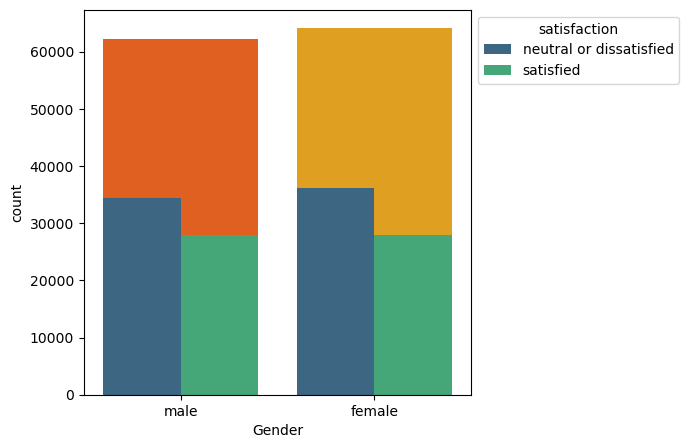

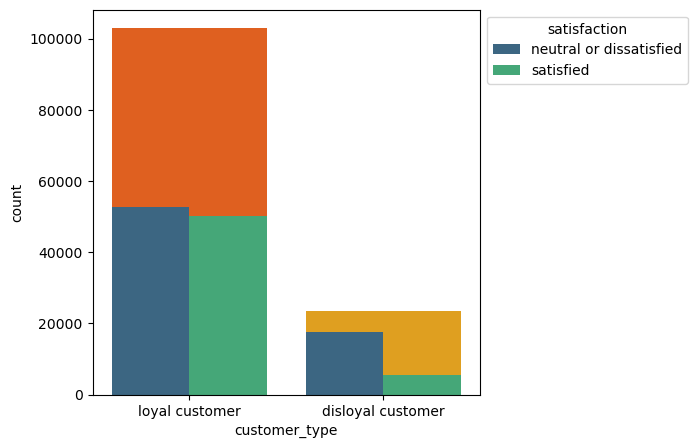

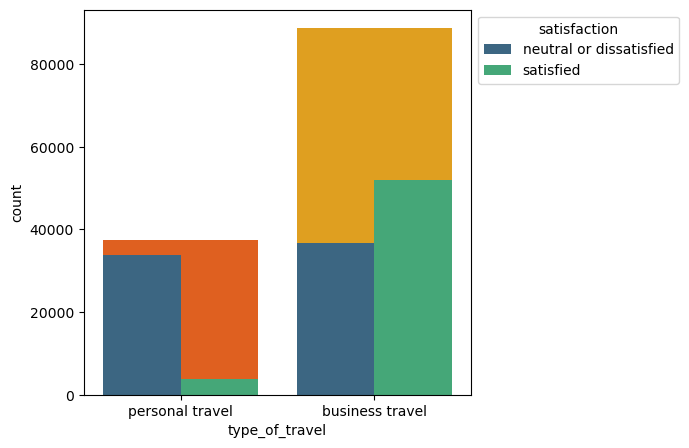

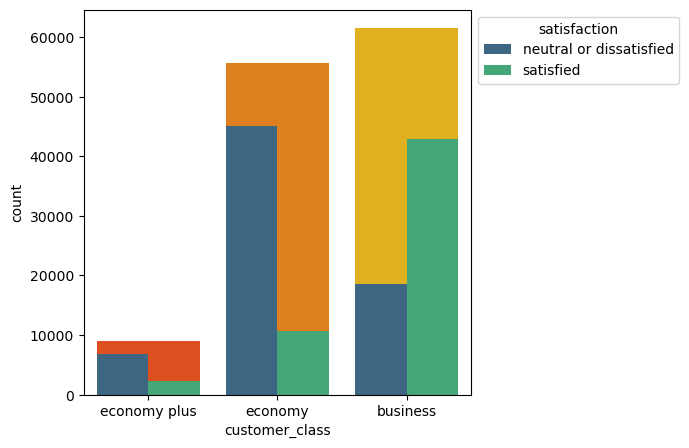

In [26]:
# Analysing categorical variables first
# ['Gender', 'customer_type', 'type_of_travel', 'customer_class', 'satisfaction']


#  https://dev.to/thalesbruno/subplotting-with-matplotlib-and-seaborn-5ei8

fig, axes = plt.subplots(figsize = (5, 5))
sns.countplot(x = 'Gender', data = df, palette= 'autumn' );
ax = sns.countplot(x = 'Gender', data = df, hue= 'satisfaction', palette= 'viridis')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

fig, axes = plt.subplots(figsize = (5, 5))
ax = sns.countplot(x = 'customer_type', data = df, palette= 'autumn');
ax =sns.countplot(x = 'customer_type', data = df, hue= 'satisfaction', palette= 'viridis');
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

fig, axes = plt.subplots(figsize = (5, 5))
ax =sns.countplot(x = 'type_of_travel', data = df,  palette= 'autumn');
ax= sns.countplot(x = 'type_of_travel', data = df, hue= 'satisfaction',  palette= 'viridis');
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

fig, axes = plt.subplots(figsize = (5, 5))
sns.countplot(x = 'customer_class', data = df,  palette= 'autumn');
ax=sns.countplot(x = 'customer_class', data = df, hue= 'satisfaction',  palette= 'viridis');
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))


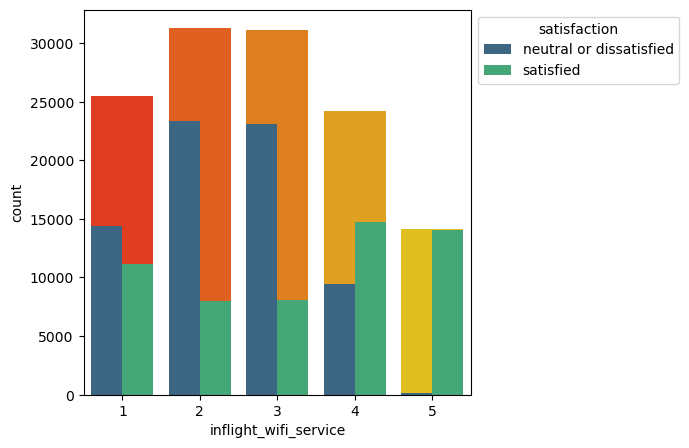

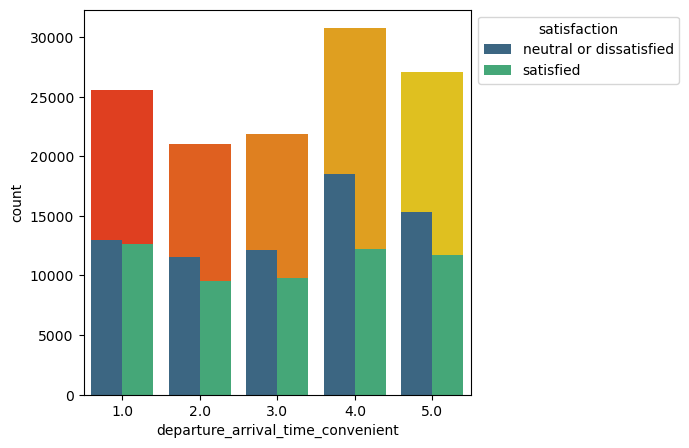

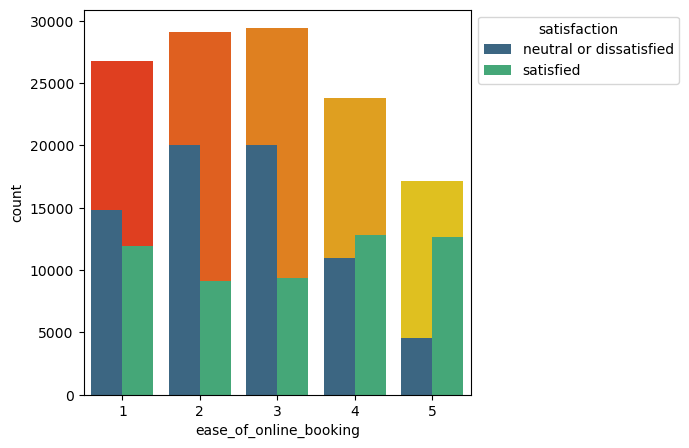

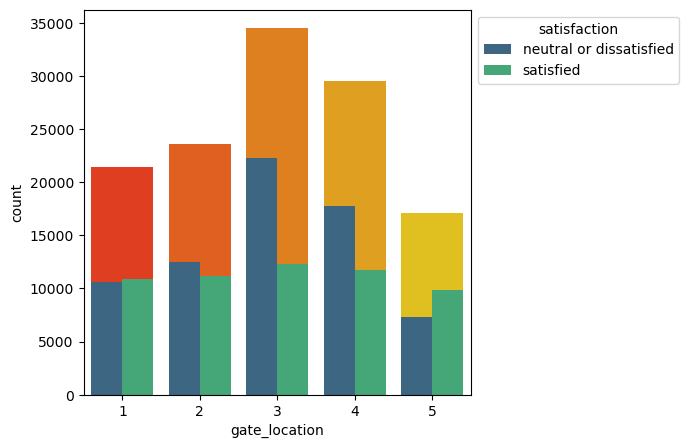

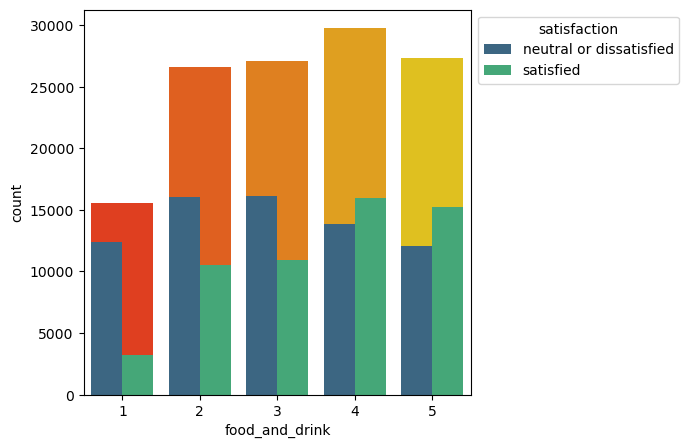

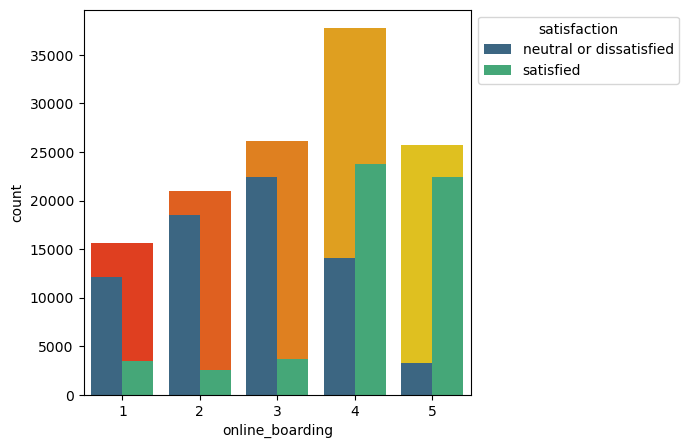

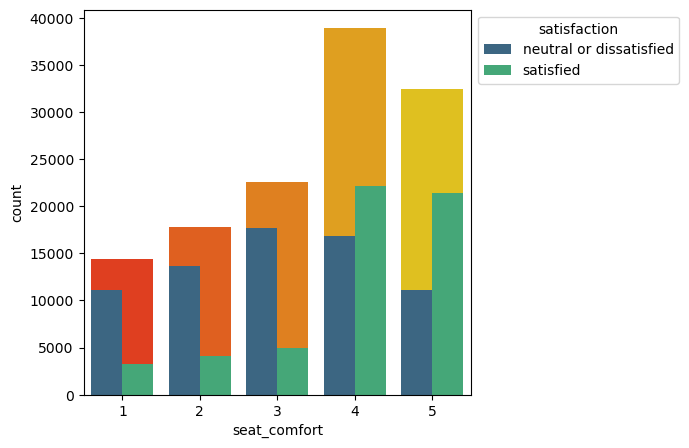

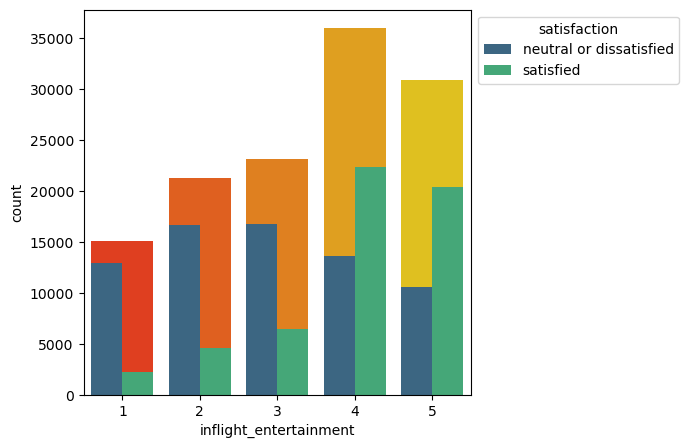

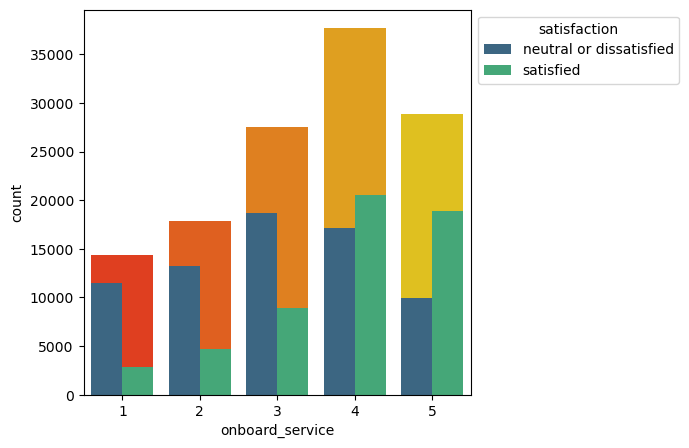

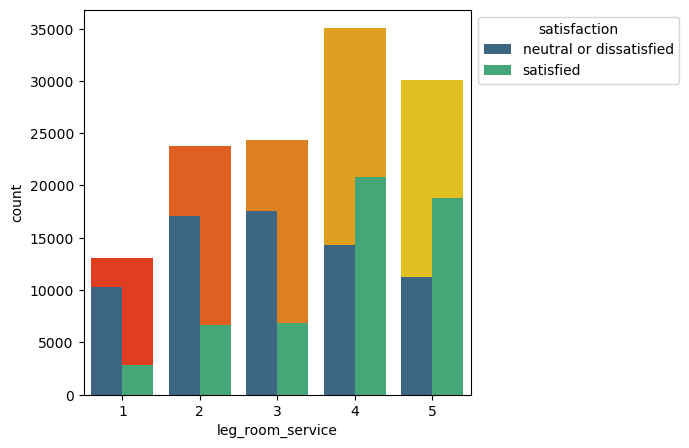

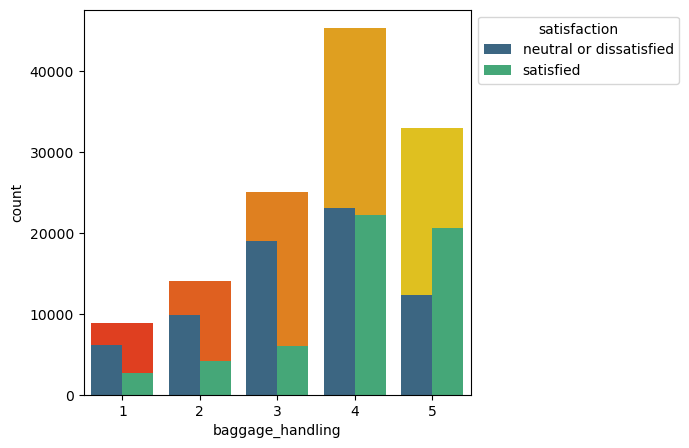

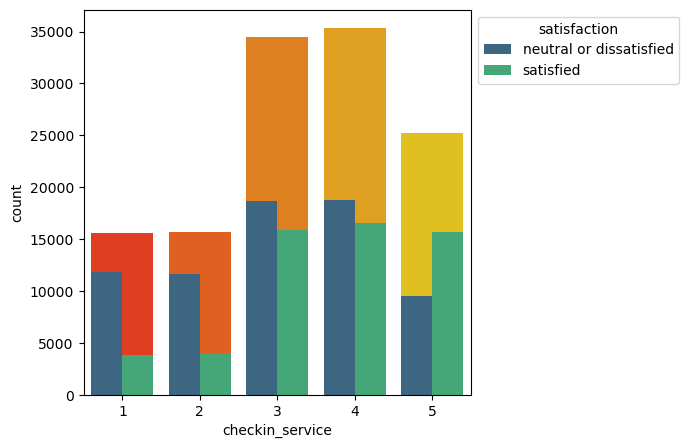

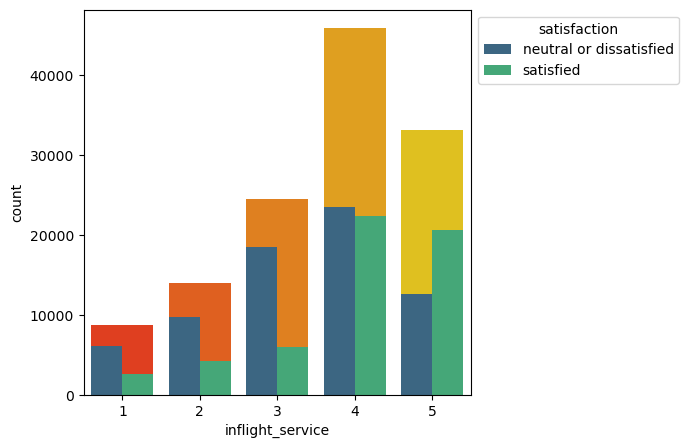

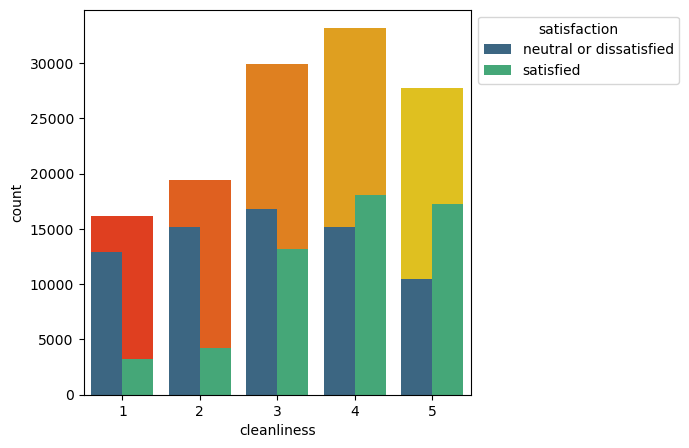

In [27]:


#  https://dev.to/thalesbruno/subplotting-with-matplotlib-and-seaborn-5ei8

#  analyzing numerical variable
# ['age', 'flight_distance', 'departure_delay_in_minutes',  'arrival_delay_in_minutes']


# 'inflight_wifi_service', 'departure_arrival_time_convenient', 'ease_of_online_booking','gate_location',
 
fig, axes = plt.subplots( figsize = (5, 5))
sns.countplot(x = 'inflight_wifi_service', data = df,  palette= 'autumn');
ax=sns.countplot(x = 'inflight_wifi_service', data = df, hue= 'satisfaction',  palette= 'viridis');
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))


fig, axes = plt.subplots( figsize = (5, 5))
sns.countplot(x = 'departure_arrival_time_convenient', data = df,  palette= 'autumn');
ax=sns.countplot(x = 'departure_arrival_time_convenient', data = df, hue= 'satisfaction',  palette= 'viridis');
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

fig, axes = plt.subplots( figsize = (5, 5))
sns.countplot(x = 'ease_of_online_booking', data = df,  palette= 'autumn');
ax=sns.countplot(x = 'ease_of_online_booking', data = df, hue= 'satisfaction',  palette= 'viridis');
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))


fig, axes = plt.subplots( figsize = (5, 5))
sns.countplot(x = 'gate_location', data = df,  palette= 'autumn');
ax=sns.countplot(x = 'gate_location', data = df, hue= 'satisfaction',  palette= 'viridis');
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

 
 
 
 
# 'food_and_drink','online_boarding', 'seat_comfort',
 
    

fig, axes = plt.subplots( figsize = (5, 5))
sns.countplot(x = 'food_and_drink', data = df,  palette= 'autumn');
ax=sns.countplot(x = 'food_and_drink', data = df, hue= 'satisfaction',  palette= 'viridis');
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

fig, axes = plt.subplots( figsize = (5, 5))
sns.countplot(x = 'online_boarding', data = df,  palette= 'autumn');
ax=sns.countplot(x = 'online_boarding', data = df, hue= 'satisfaction',  palette= 'viridis');
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    
fig, axes = plt.subplots( figsize = (5, 5))
sns.countplot(x = 'seat_comfort', data = df,  palette= 'autumn');
ax = sns.countplot(x = 'seat_comfort', data = df, hue= 'satisfaction',  palette= 'viridis');
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))




#  'inflight_entertainment', 'onboard_service','leg_room_service', 'baggage_handling',  'checkin_service',  'inflight_service',
 
#  'cleanliness', 
 

fig, axes = plt.subplots( figsize = (5, 5))
sns.countplot(x = 'inflight_entertainment', data = df,   palette= 'autumn');
ax =sns.countplot(x = 'inflight_entertainment', data = df, hue= 'satisfaction',  palette= 'viridis');
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

 


fig, axes = plt.subplots( figsize = (5, 5))
sns.countplot(x = 'onboard_service', data = df,   palette= 'autumn');
ax =sns.countplot(x = 'onboard_service', data = df, hue= 'satisfaction',  palette= 'viridis');
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))


fig, axes = plt.subplots( figsize = (5, 5))
sns.countplot(x = 'leg_room_service', data = df,   palette= 'autumn');
ax =sns.countplot(x = 'leg_room_service', data = df, hue= 'satisfaction',  palette= 'viridis');
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))


fig, axes = plt.subplots( figsize = (5, 5))
sns.countplot(x = 'baggage_handling', data = df,   palette= 'autumn');
ax =sns.countplot(x = 'baggage_handling', data = df, hue= 'satisfaction',  palette= 'viridis');
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))



fig, axes = plt.subplots( figsize = (5, 5))
sns.countplot(x = 'checkin_service', data = df,   palette= 'autumn');
ax =sns.countplot(x = 'checkin_service', data = df, hue= 'satisfaction',  palette= 'viridis');
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))


fig, axes = plt.subplots( figsize = (5, 5))
sns.countplot(x = 'inflight_service', data = df,   palette= 'autumn');
ax =sns.countplot(x = 'inflight_service', data = df, hue= 'satisfaction',  palette= 'viridis');
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

fig, axes = plt.subplots( figsize = (5, 5))
sns.countplot(x = 'cleanliness', data = df,palette= 'autumn');
ax=sns.countplot(x = 'cleanliness', data = df, hue= 'satisfaction',  palette= 'viridis');
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))







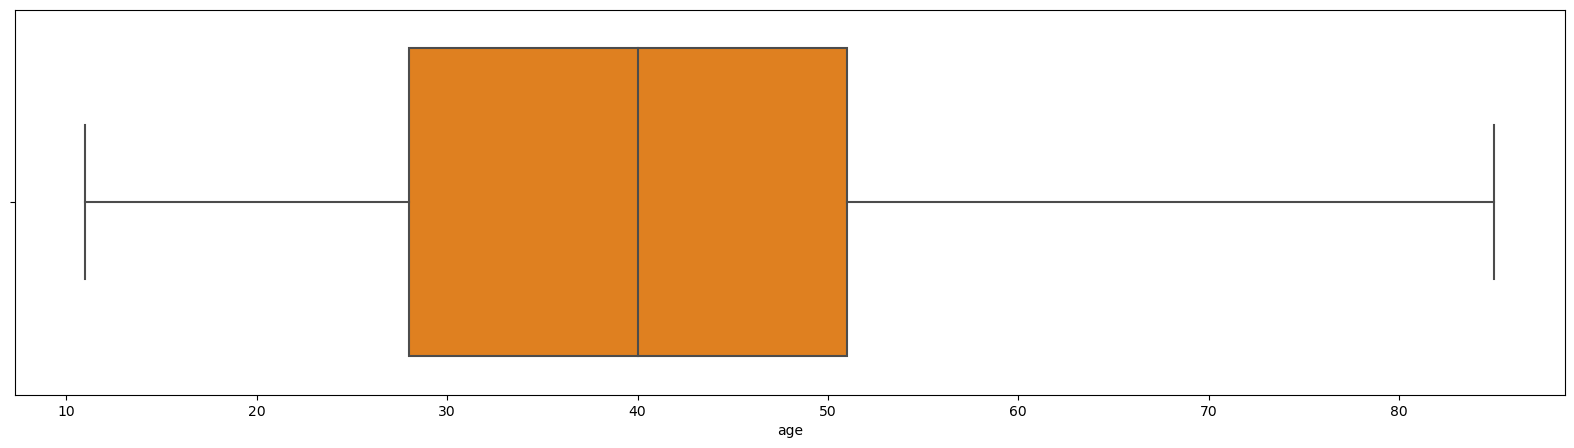

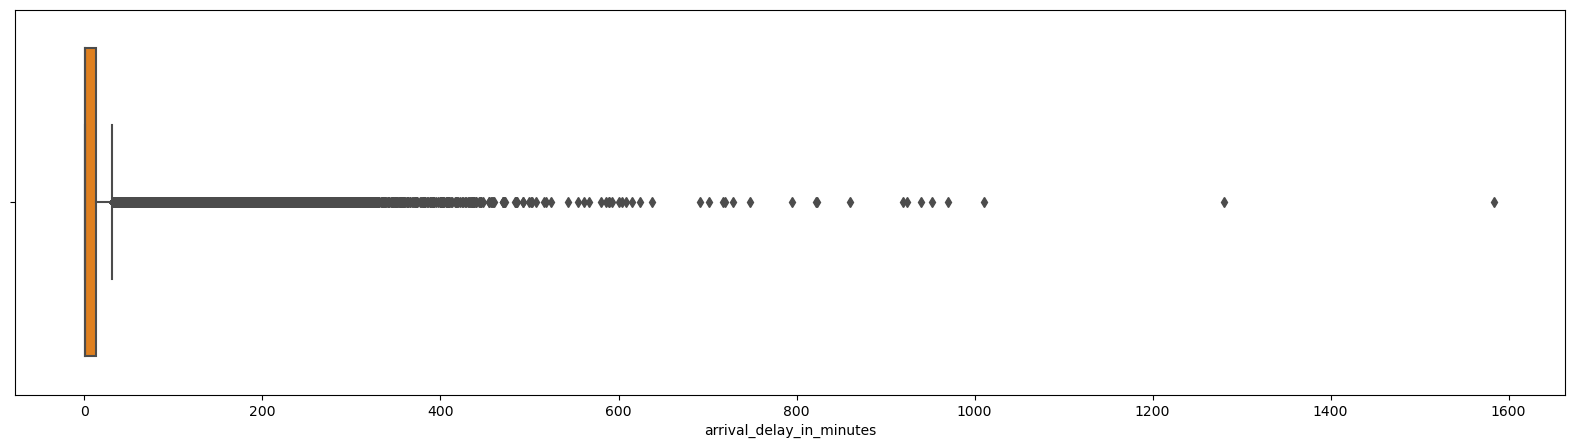

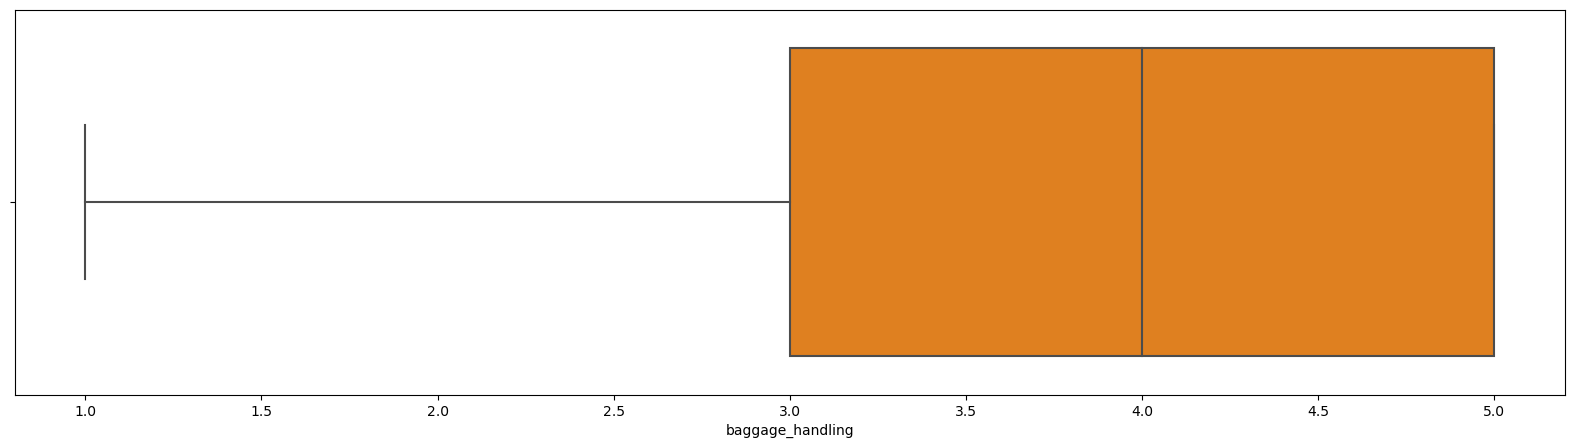

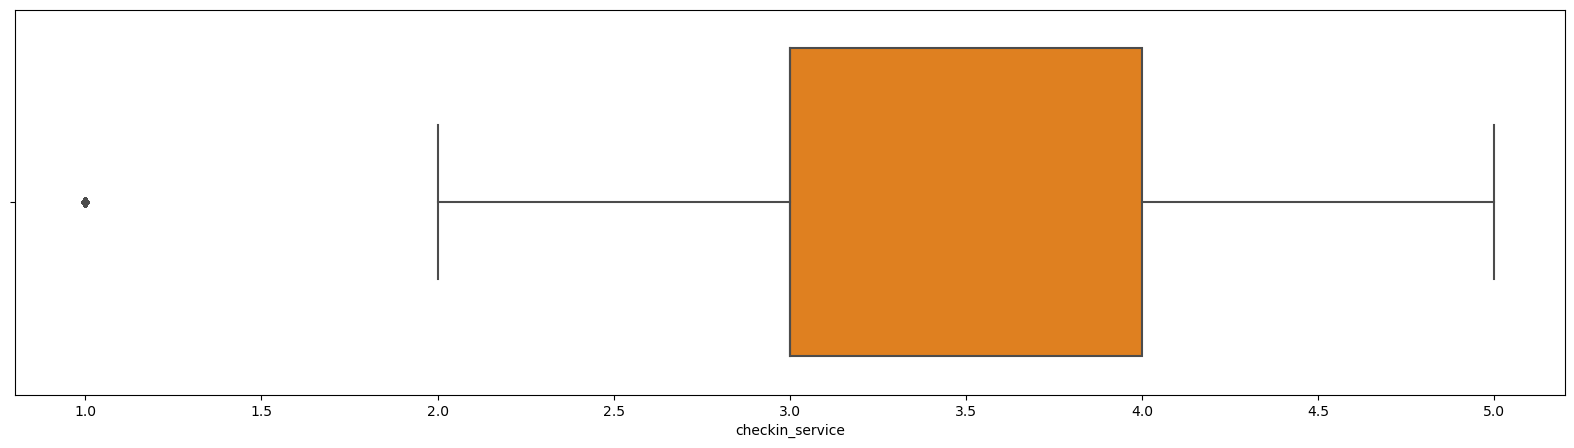

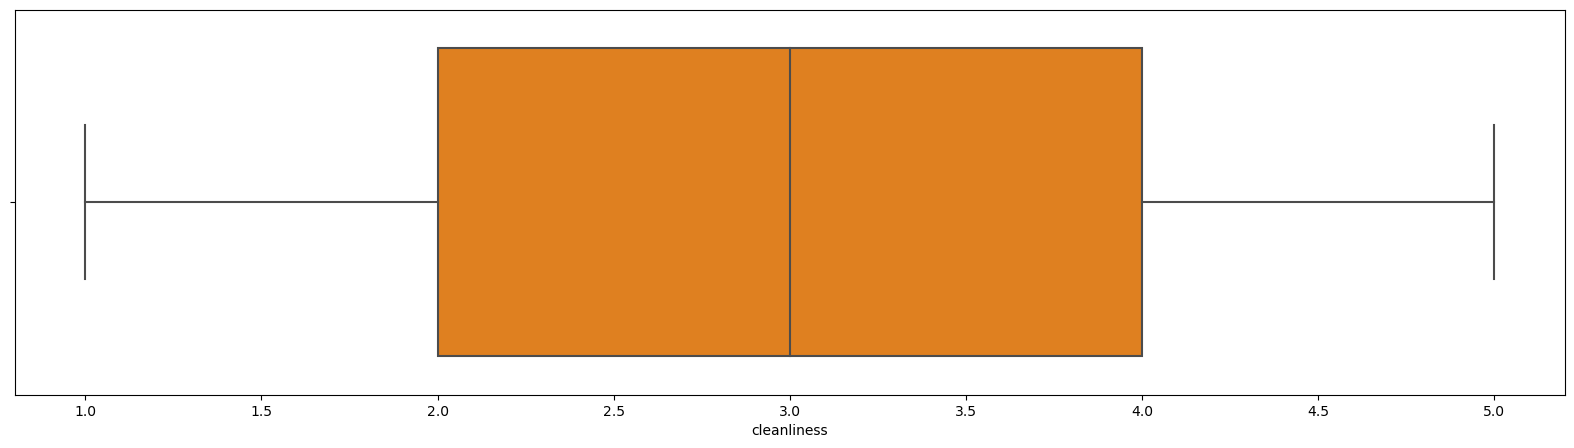

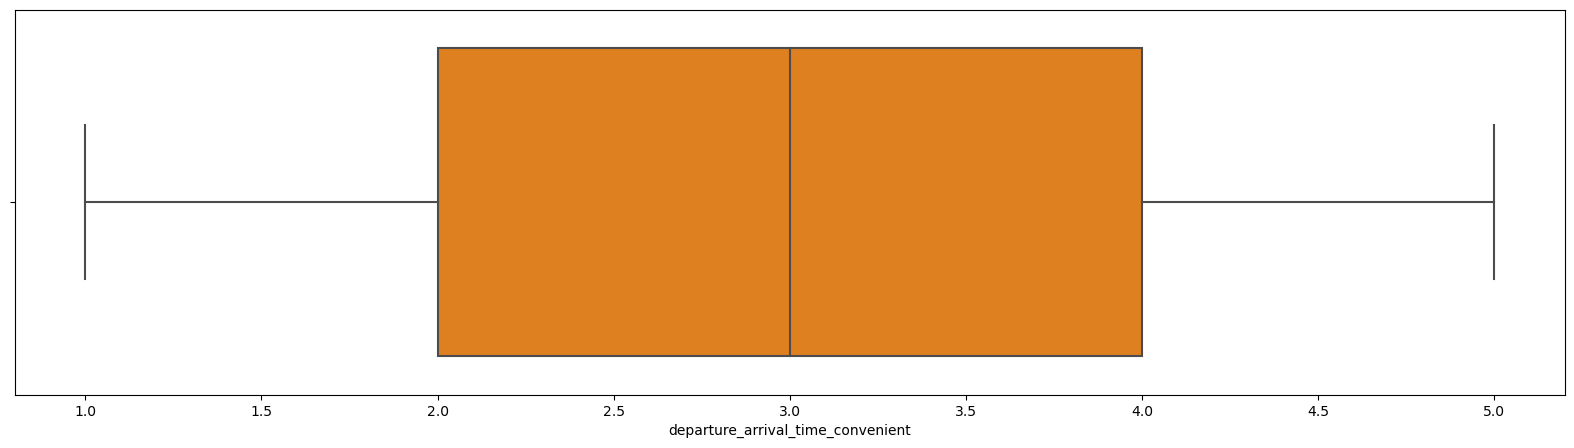

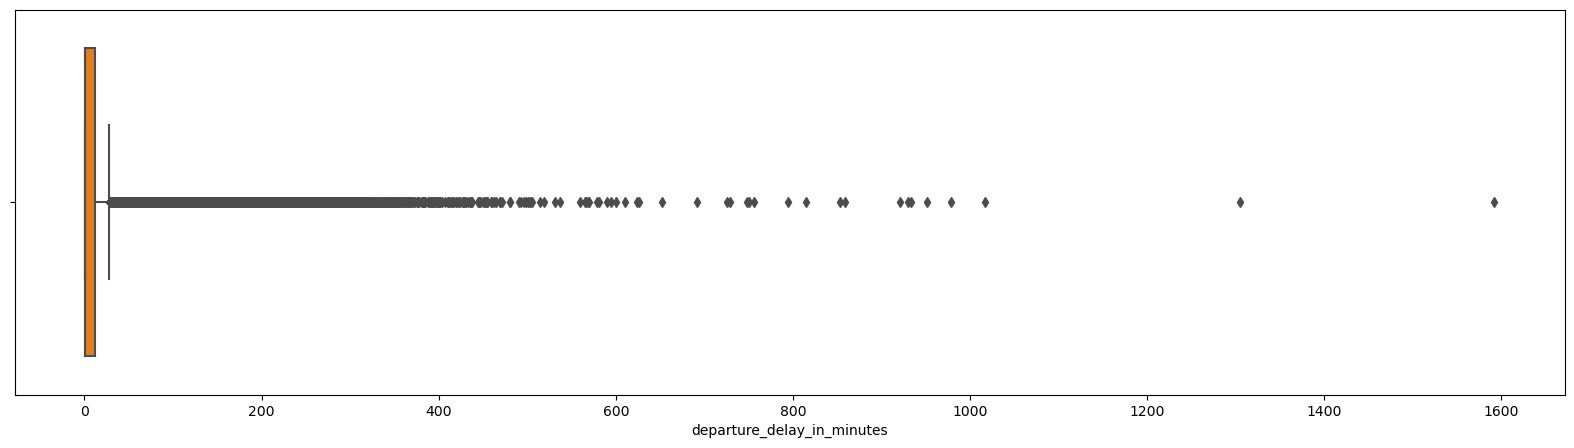

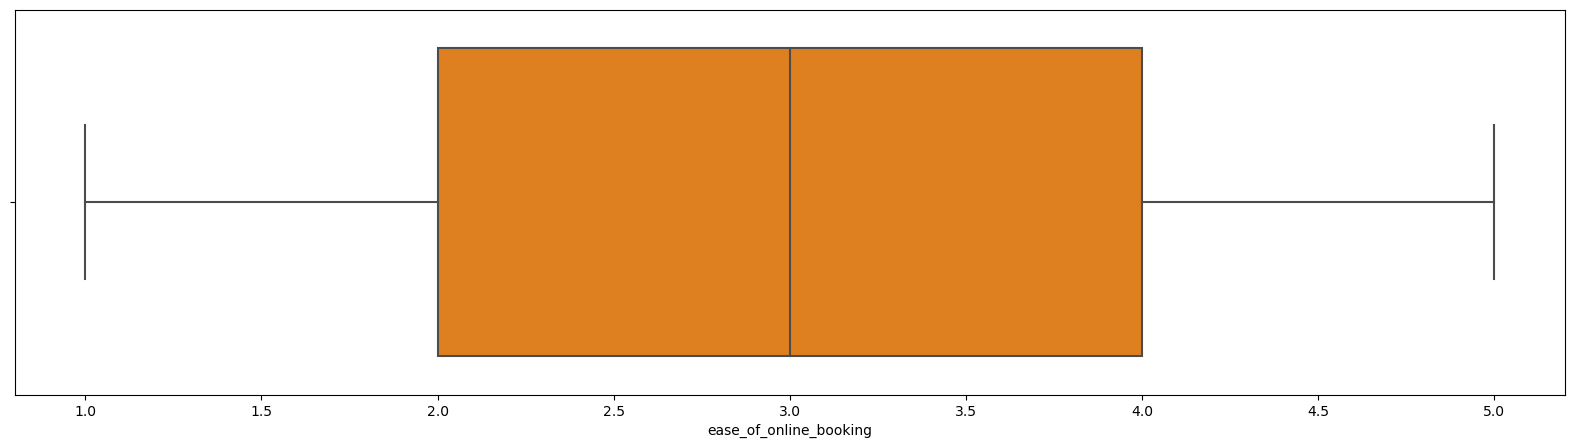

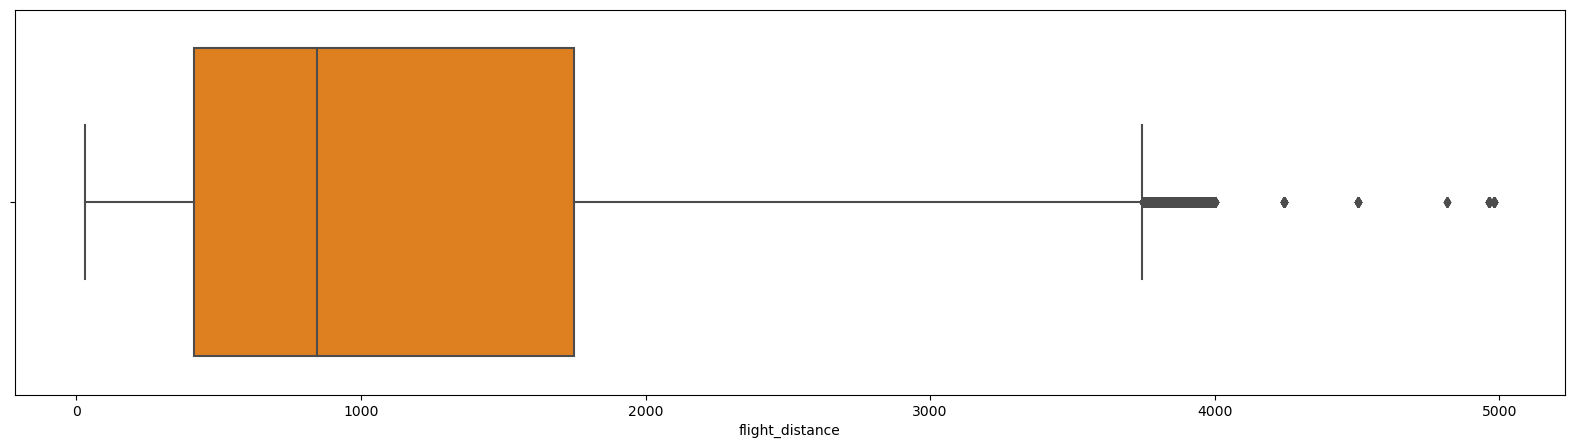

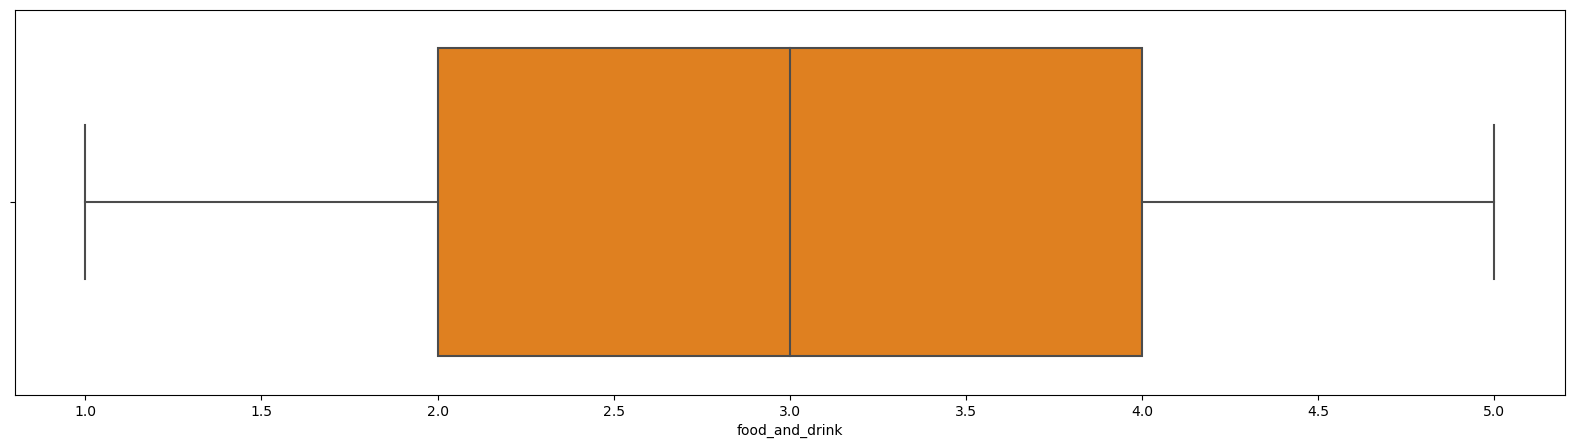

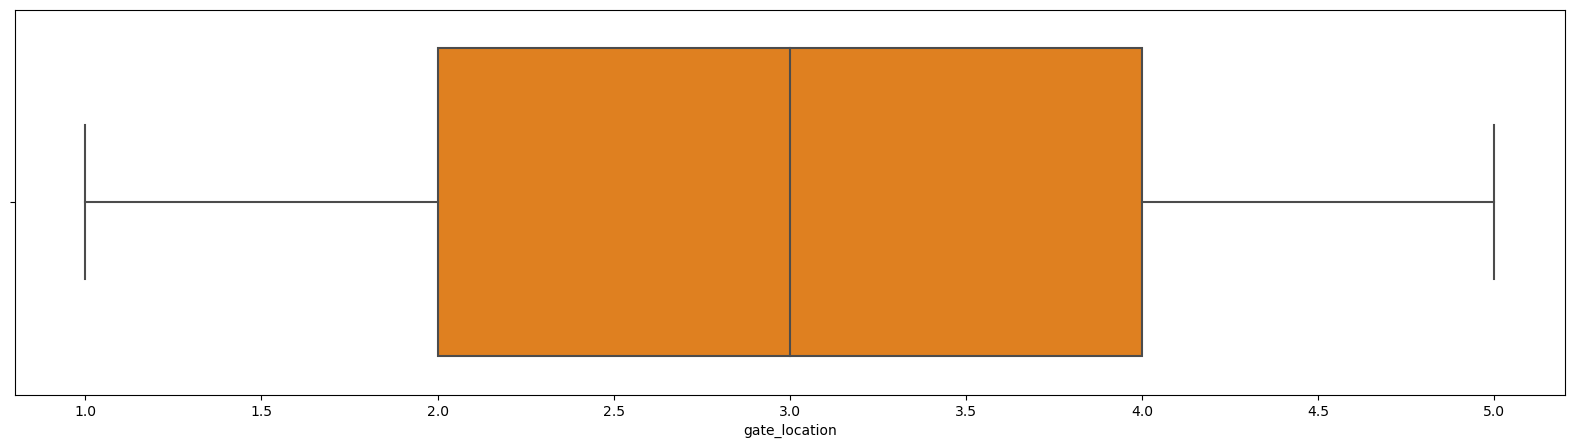

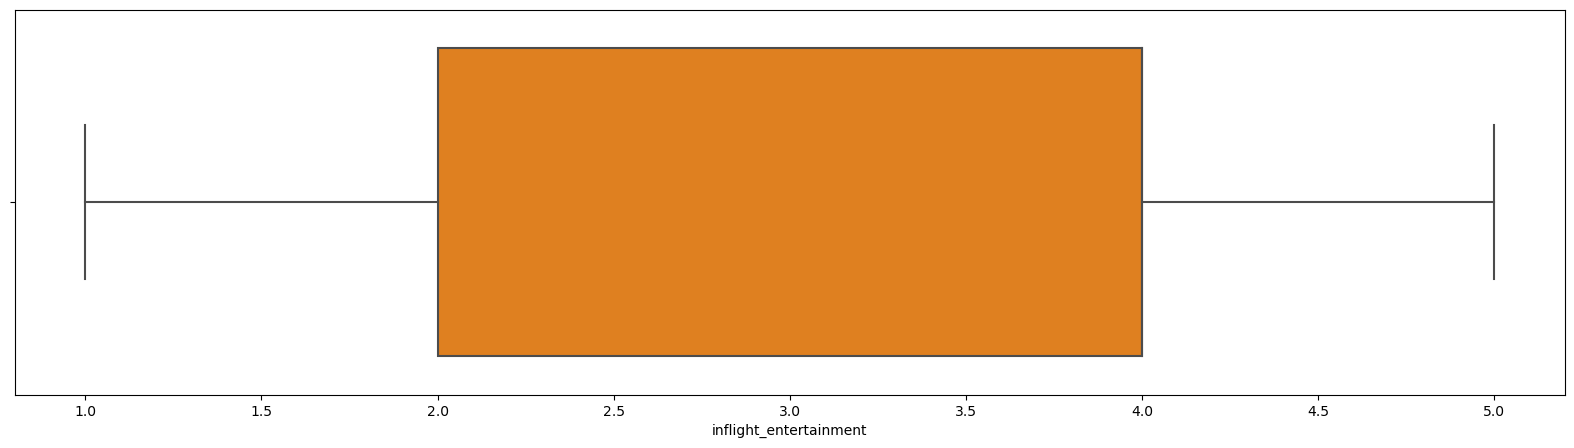

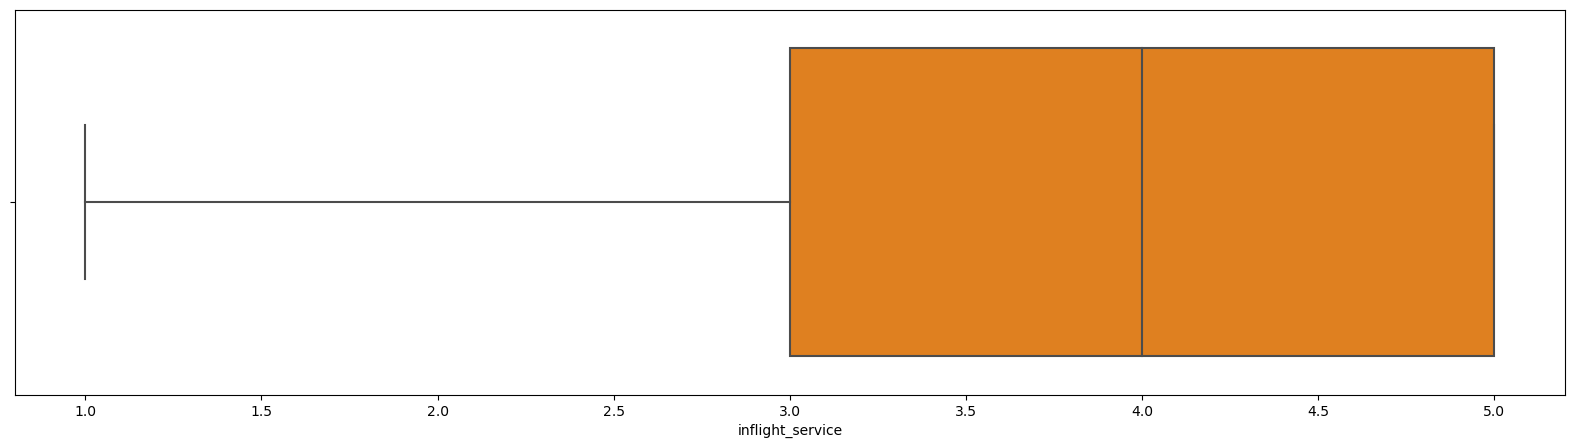

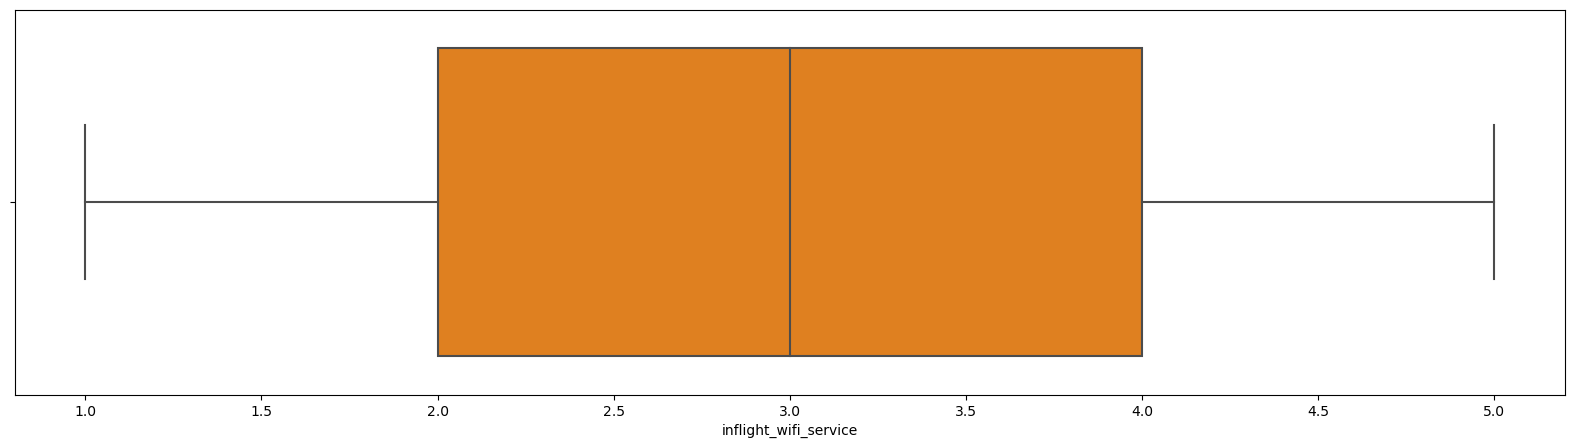

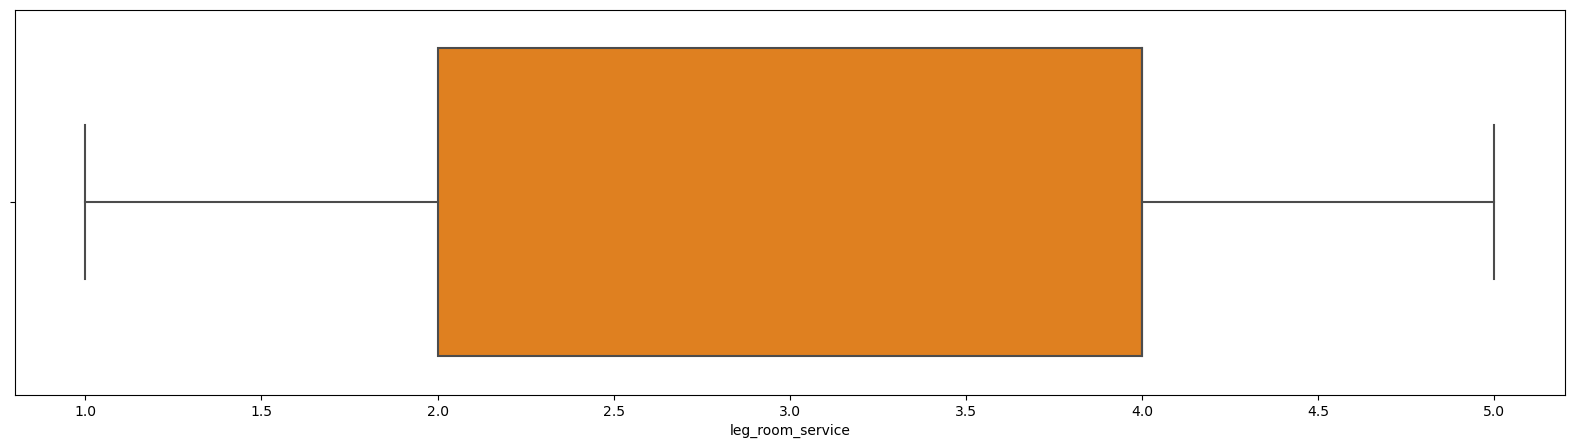

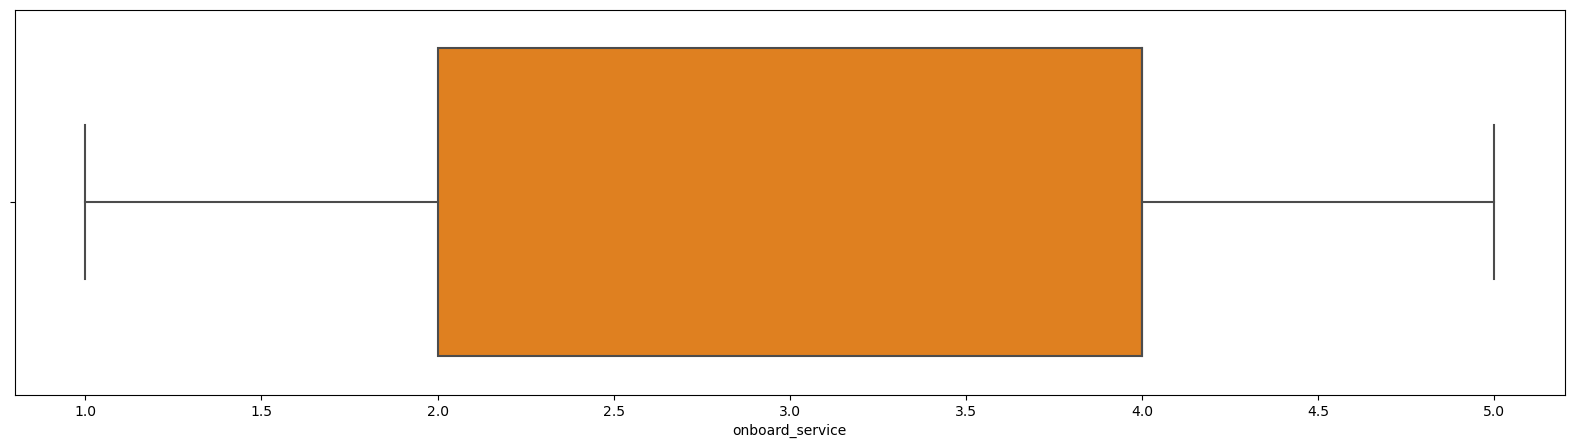

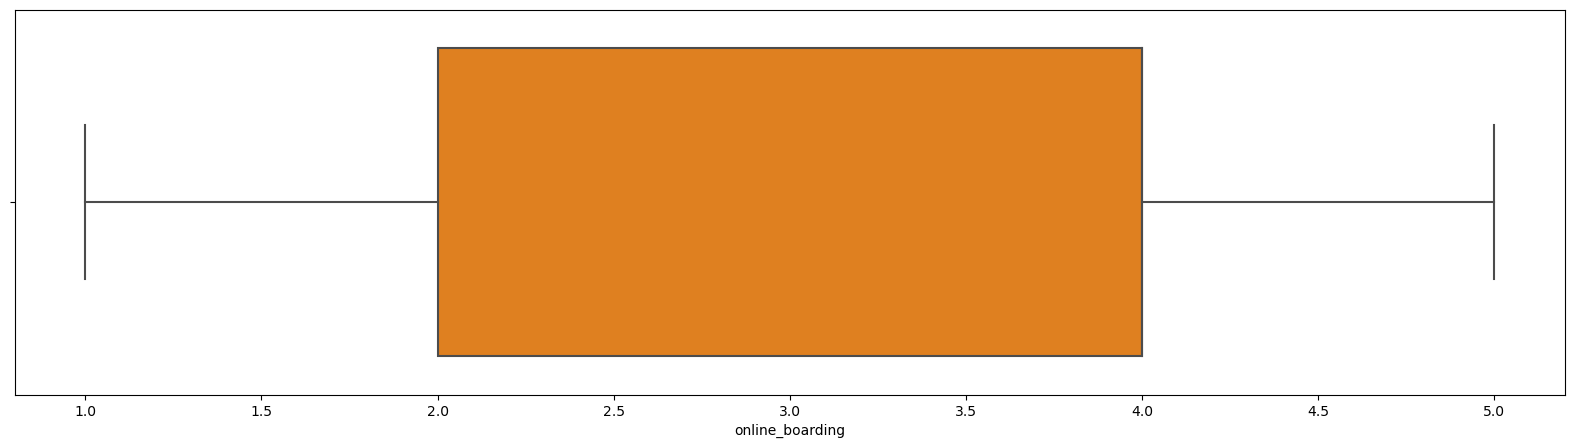

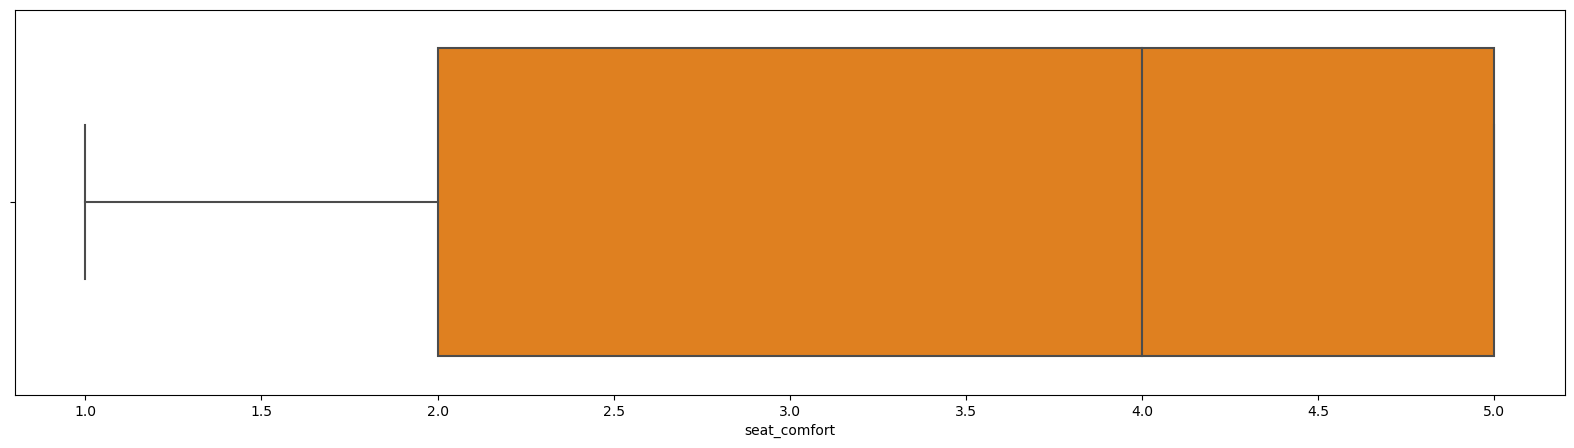

In [28]:
for col in numerical_variables:
    fig, ax = plt.subplots(figsize = (20, 5))
    sns.boxplot(x = df[col], palette= 'autumn')

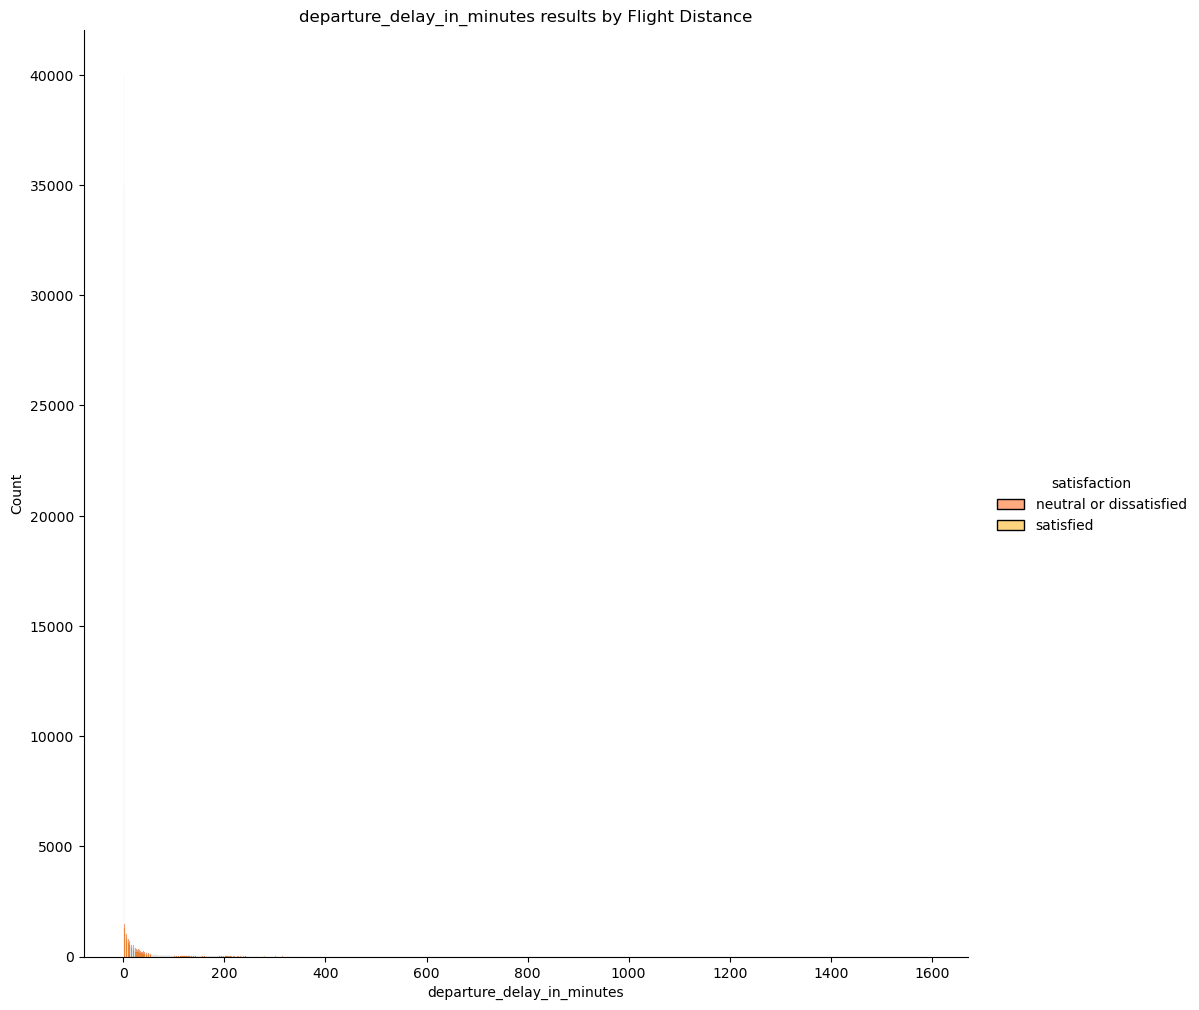

In [29]:
# create graph
sns.displot(x = "departure_delay_in_minutes", data = df, hue ="satisfaction",log_scale = False ,height = 10,palette ="autumn"  )
plt.title("departure_delay_in_minutes results by Flight Distance")
plt.show()

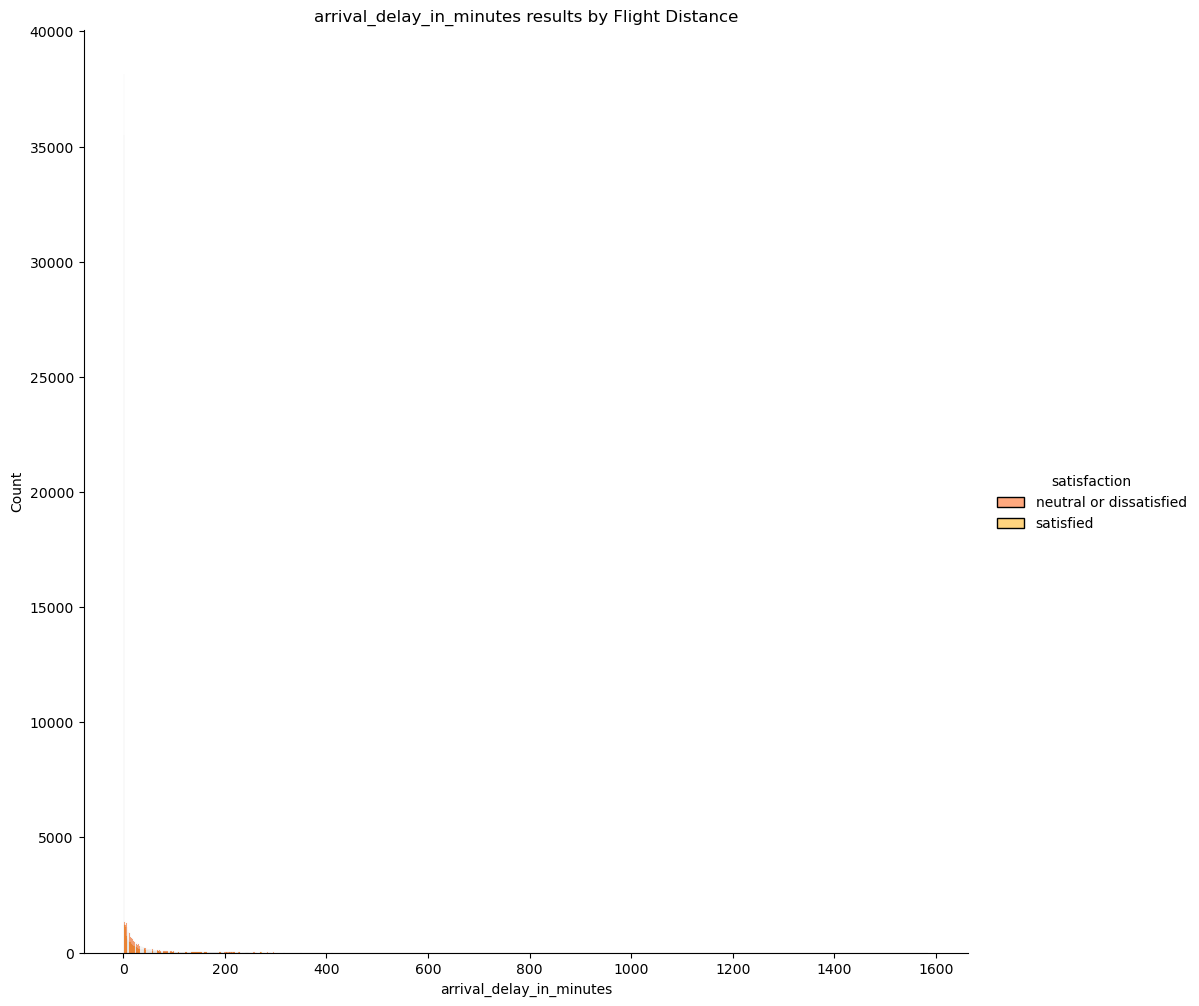

In [30]:
# create graph
sns.displot(x = "arrival_delay_in_minutes", data = df, hue ="satisfaction",log_scale = False ,height = 10,palette ="autumn"  )
plt.title("arrival_delay_in_minutes results by Flight Distance")
plt.show()

/var/folders/qs/9djmvdkd1g55w_1df5f8sm_80000gn/T/ipykernel_40029/963994258.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[col],palette= 'autumn', color='orange')
/var/folders/qs/9djmvdkd1g55w_1df5f8sm_80000gn/T/ipykernel_40029/963994258.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[col],palette= 'autumn', color='orange')
/var/folders/qs/9djmvdkd1g55w_1df5f8sm_80000gn/T/ipykernel_40029/963994258.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[col],palette= 'autumn', color='orange')
/var/folders/qs/9djmvdkd1g55w_1df5f8sm_80000gn/T/ipykernel_40029/963994258.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[col],palette= 'autumn', color='orange')


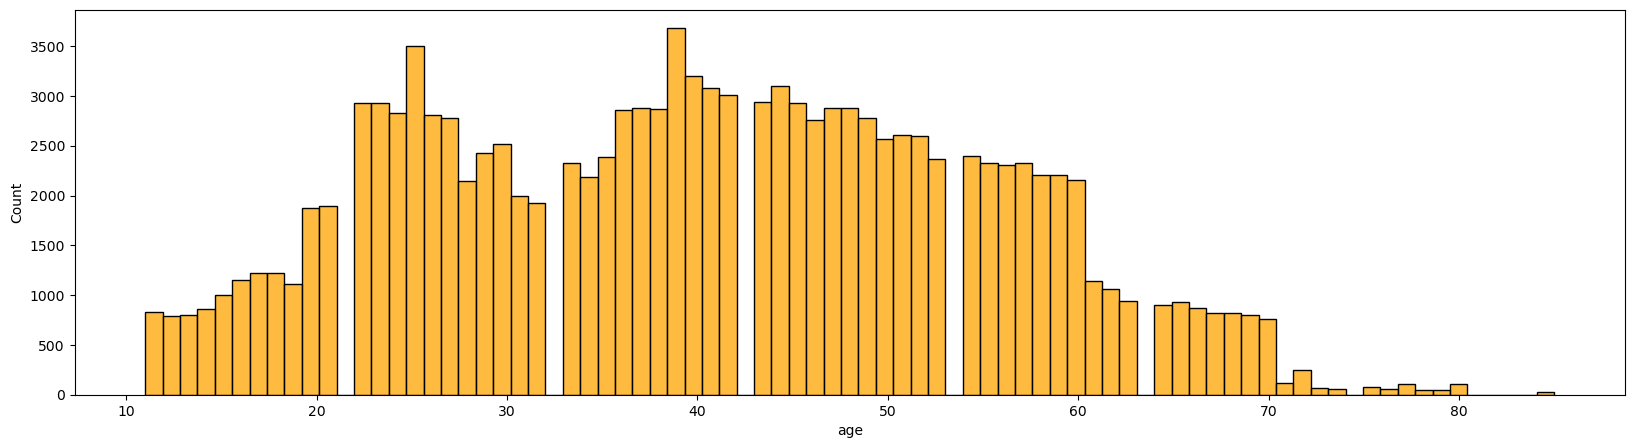

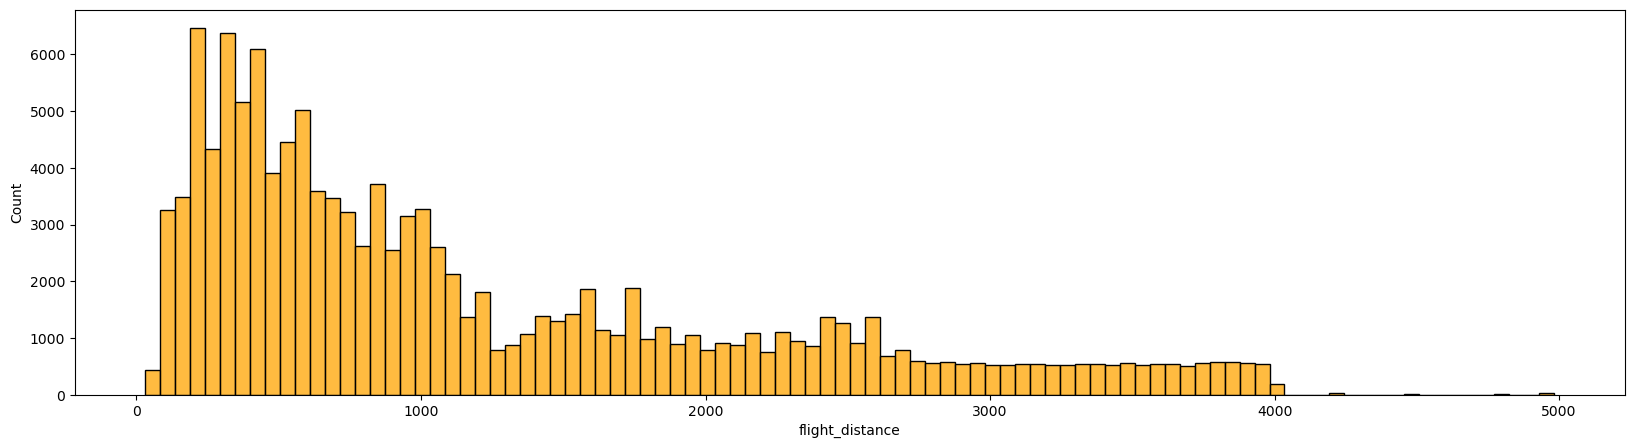

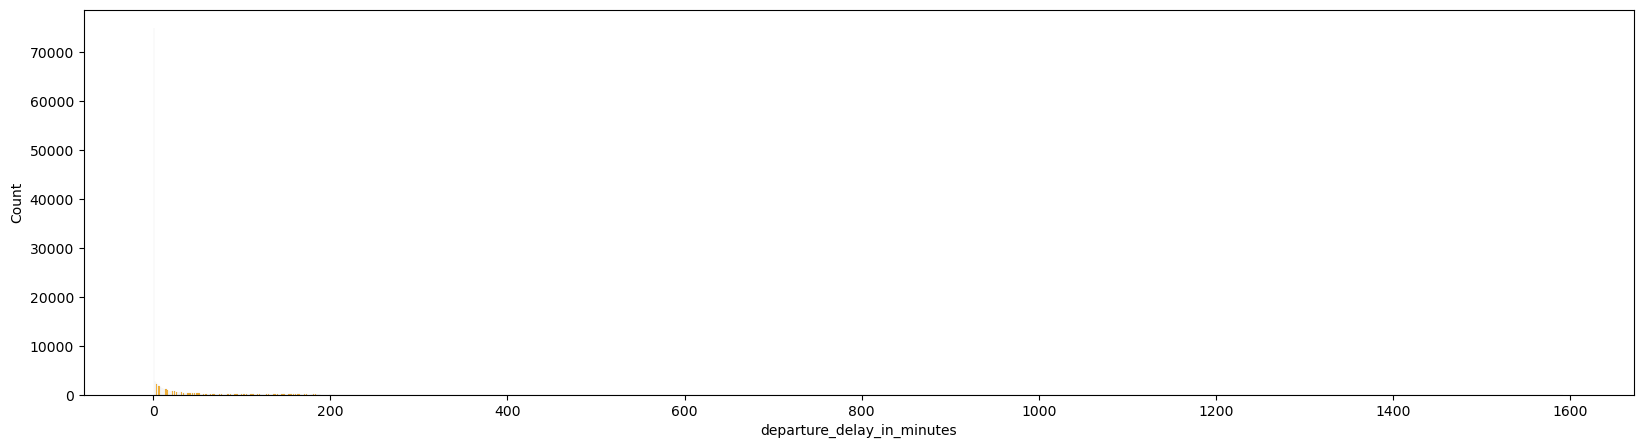

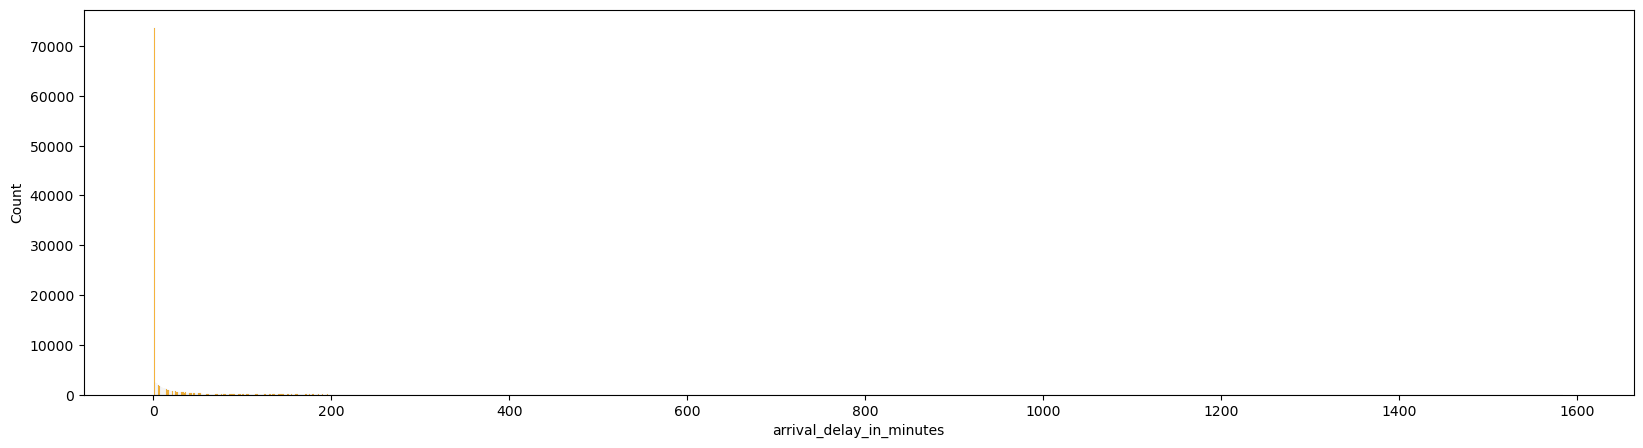

In [31]:
# sns.set_context('notebook', font_scale= 1.2)
continuos_variable = ['age', 'flight_distance', 'departure_delay_in_minutes',  'arrival_delay_in_minutes']
for col in continuos_variable:
    fig, ax = plt.subplots(figsize = (20, 5))
    sns.histplot(df[col],palette= 'autumn', color='orange')


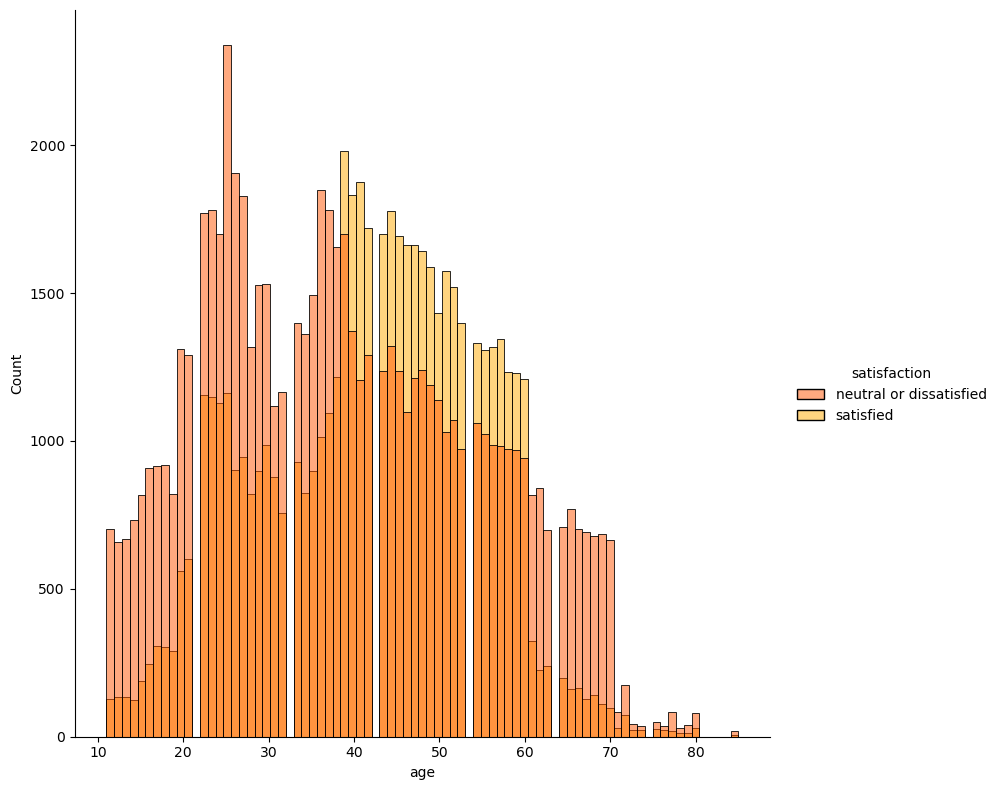

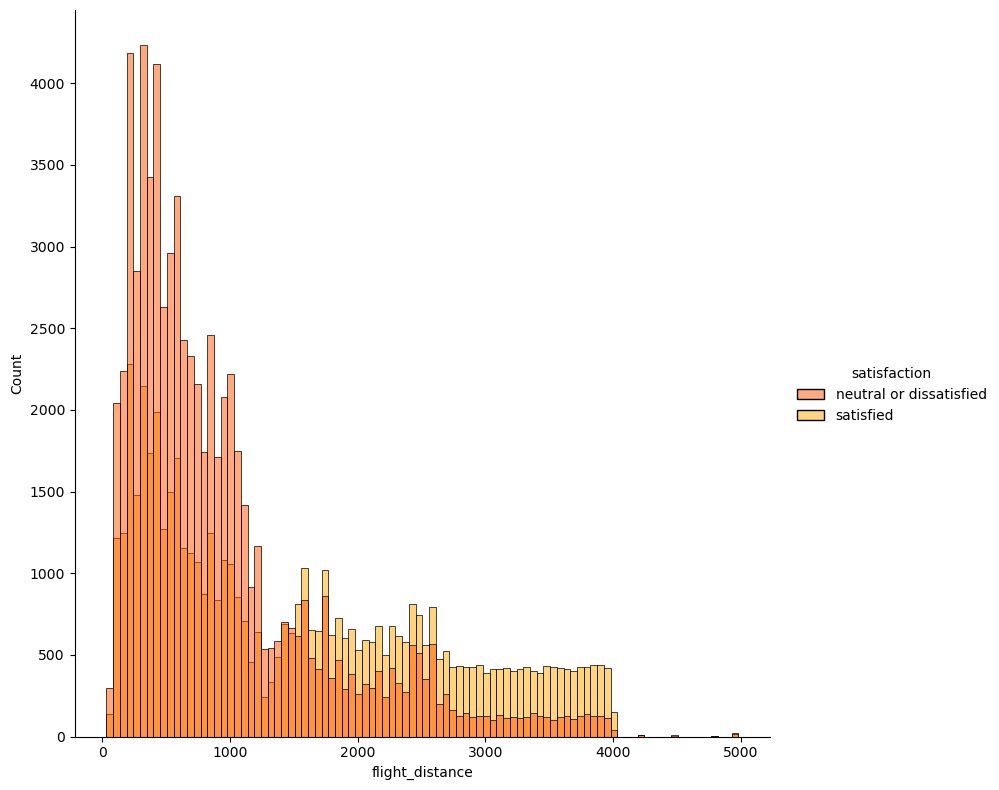

In [32]:
# create graph
sns.displot(x = "age", data = df, hue ="satisfaction", height = 8,palette ="autumn"  )
plt.show()

sns.displot(x = "flight_distance", data = df, hue ="satisfaction", height = 8,palette ="autumn"  )
plt.show()

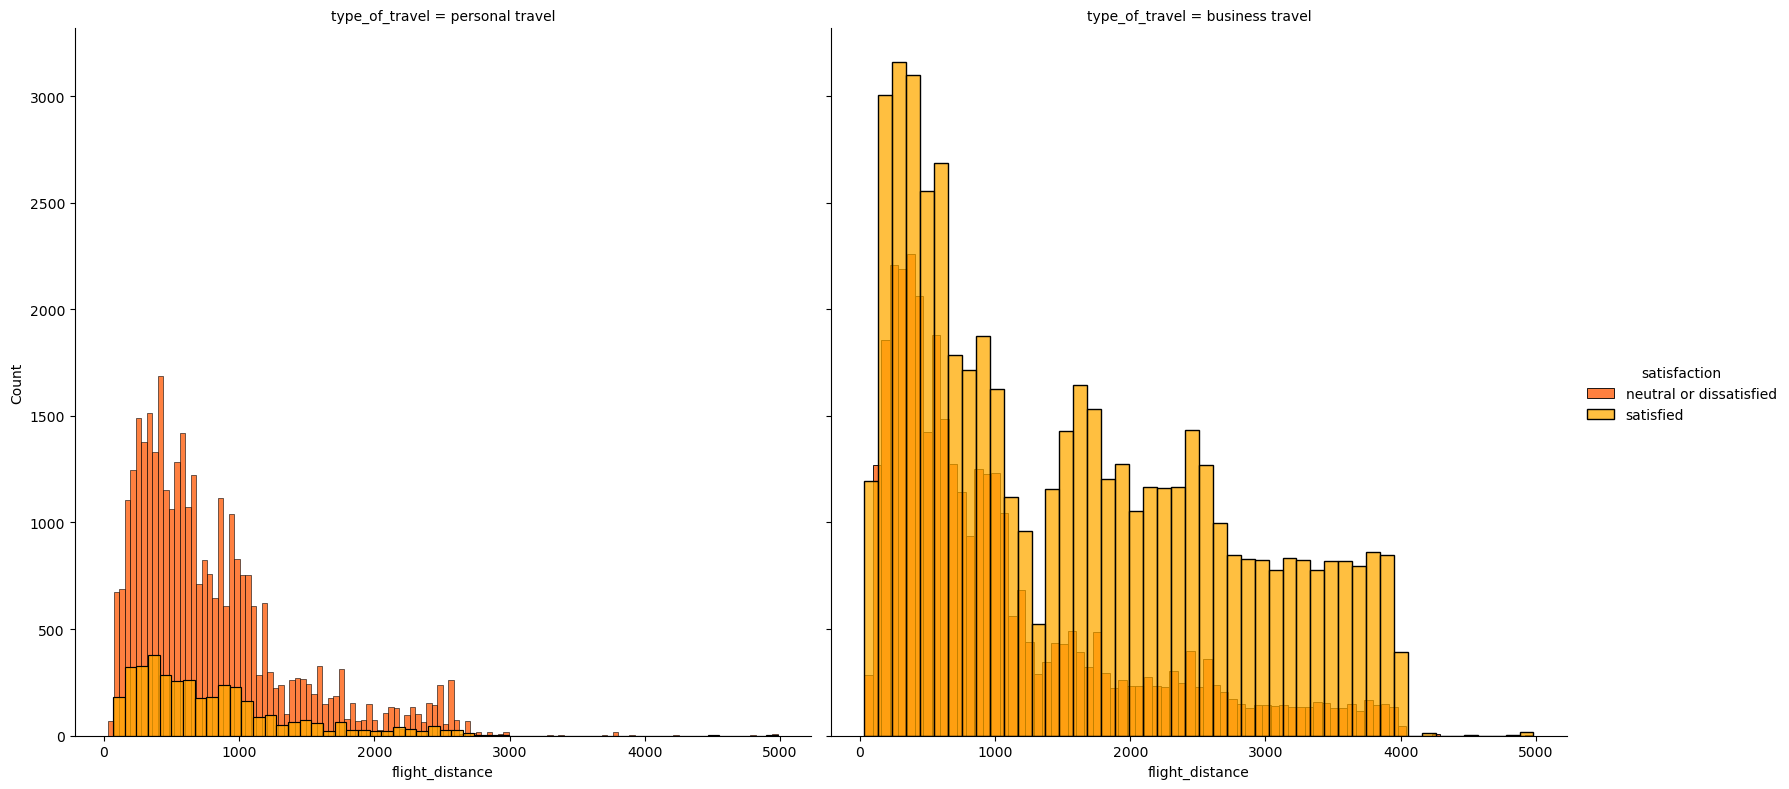

In [33]:
# create graph
g = sns.FacetGrid(df, col = "type_of_travel", hue ="satisfaction", height = 8, palette ="autumn" )
g.map(sns.histplot, "flight_distance",  )
g.add_legend()
plt.show()

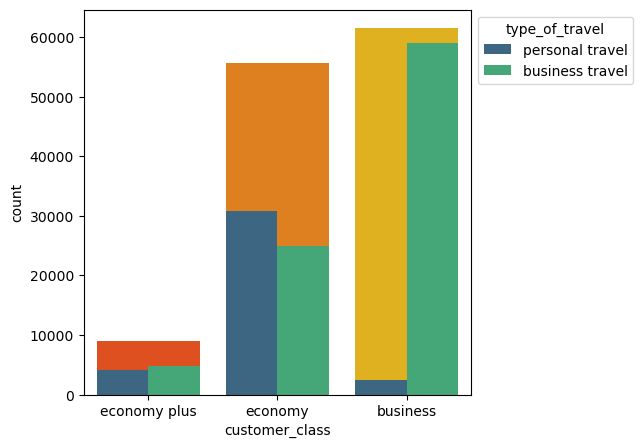

In [34]:
fig, axes = plt.subplots(figsize = (5, 5))
ax = sns.countplot(x = 'customer_class', data = df, palette= 'autumn');
ax =sns.countplot(x = 'customer_class', data = df, hue= 'type_of_travel', palette= 'viridis');
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

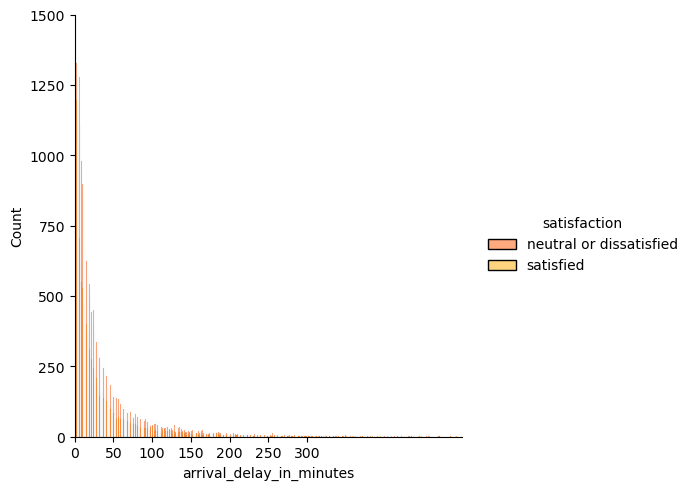

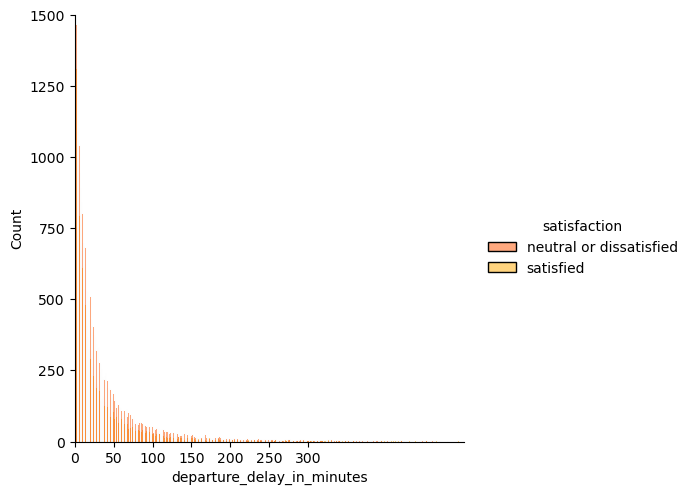

In [35]:
# create graph
sns.displot(x = 'arrival_delay_in_minutes', data = df, hue ="satisfaction",palette ="autumn"  )
plt.xticks([0, 50, 100, 150,200,250,300])
plt.yticks([0,250, 500,750, 1000,1250, 1500,1750,2000])
plt.xlim(0, 500)
plt.ylim(0, 1500)
plt.show()

sns.displot(x = 'departure_delay_in_minutes', data = df, hue ="satisfaction",palette ="autumn"  )
plt.xticks([0, 50, 100, 150,200,250,300])
plt.yticks([0,250, 500,750, 1000,1250, 1500,1750,2000])
plt.xlim(0, 500)
plt.ylim(0, 1500)
plt.show()

<AxesSubplot:>

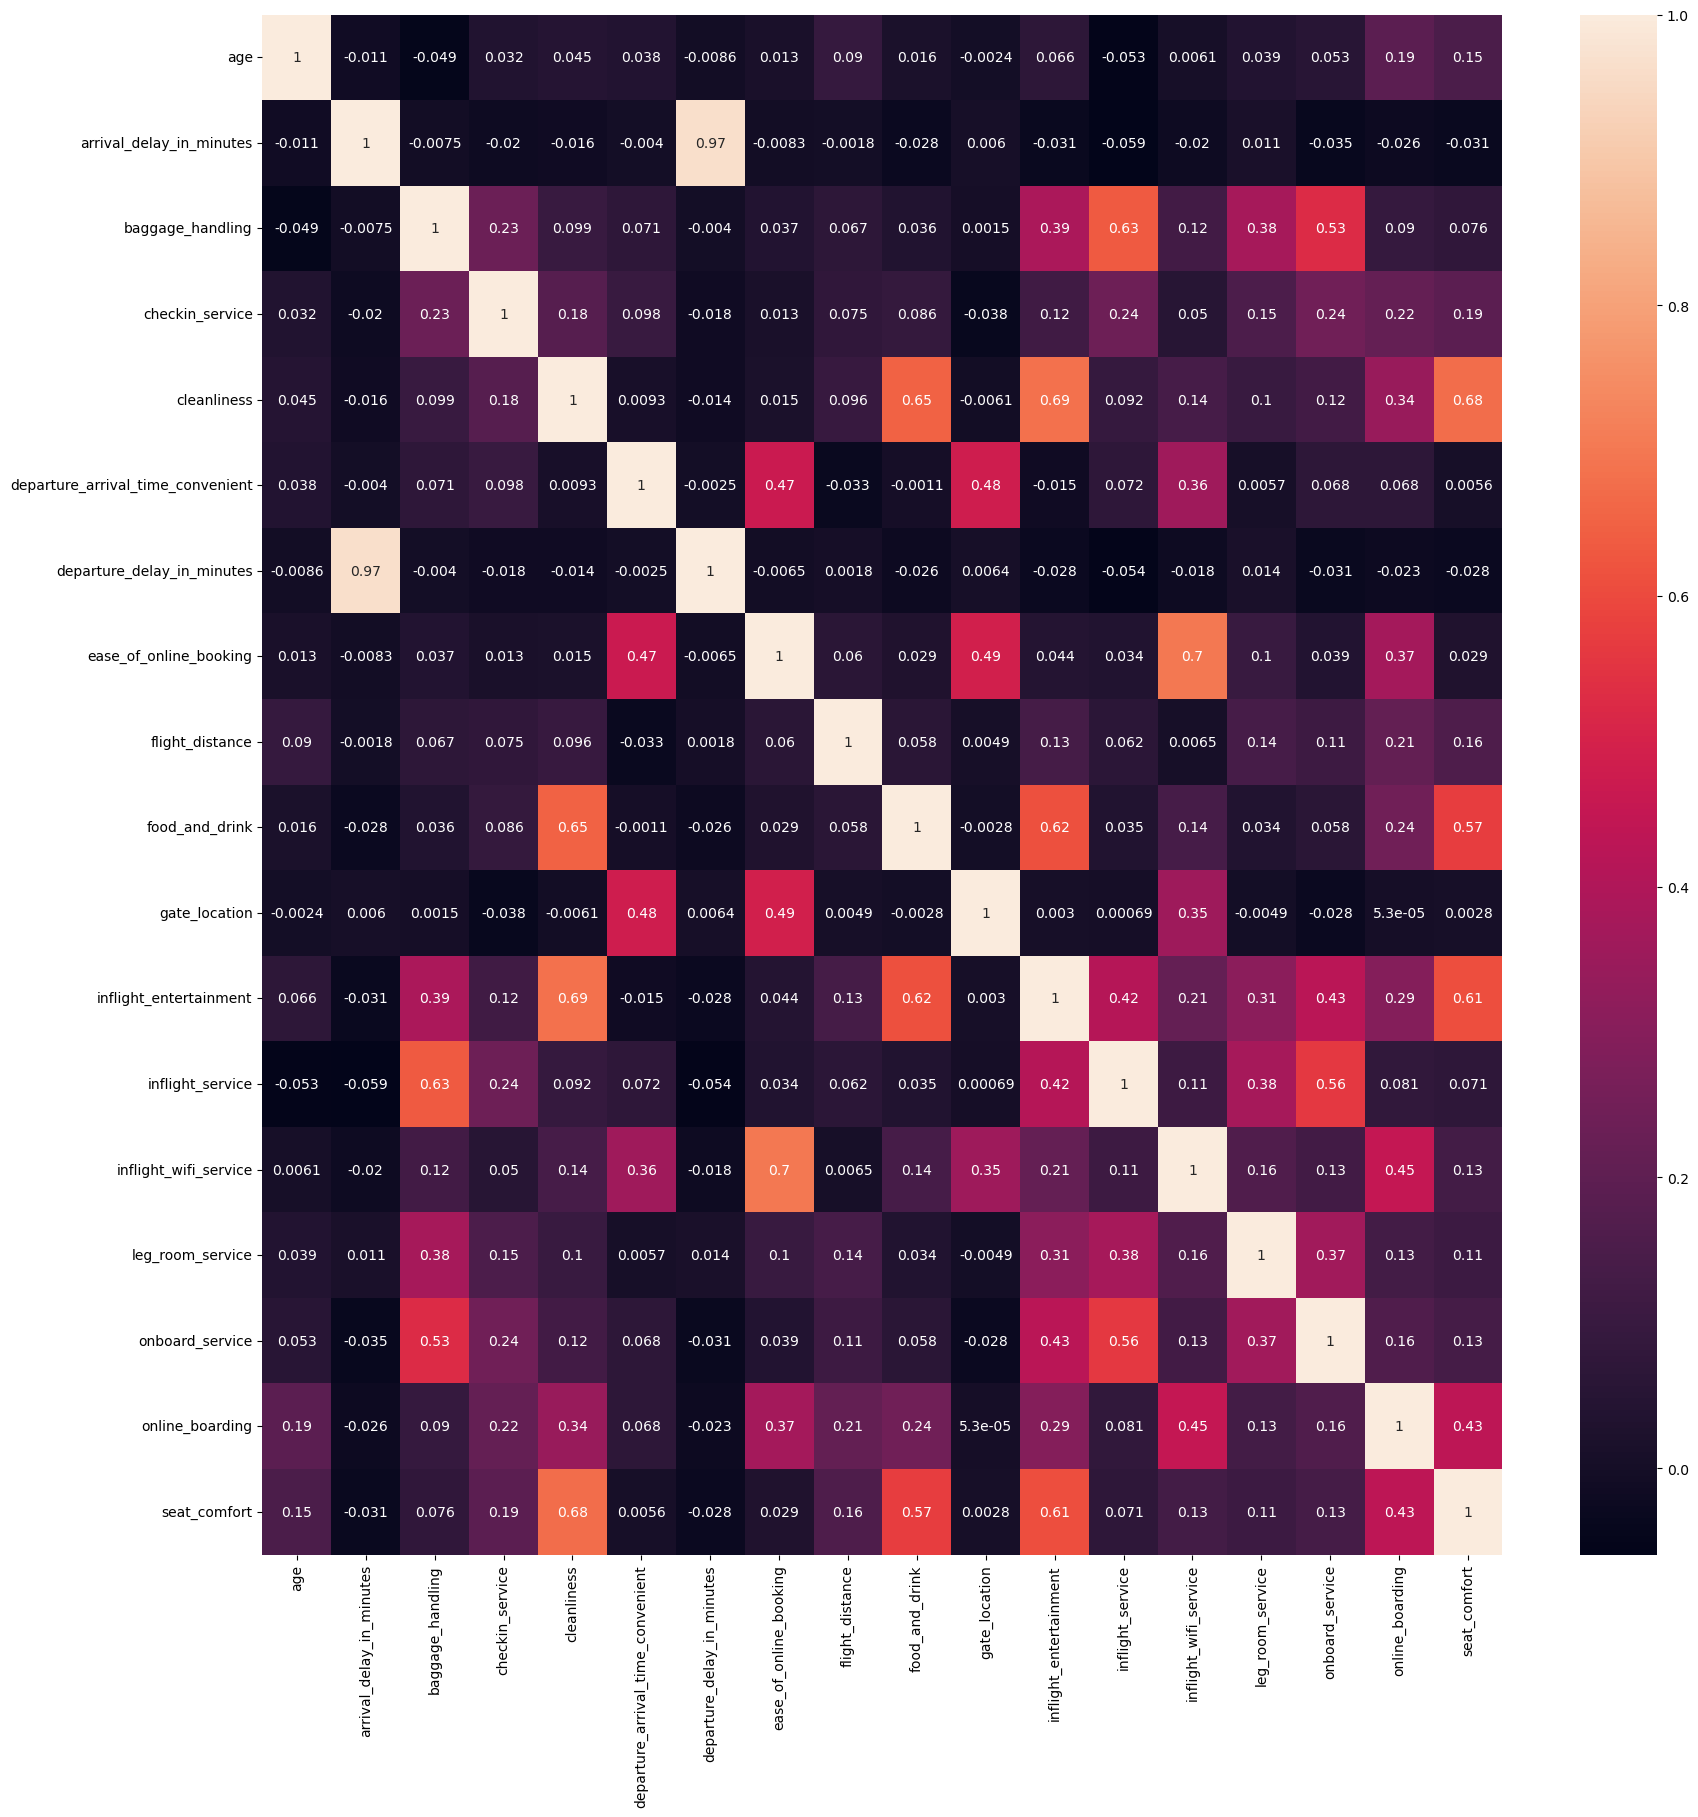

In [36]:
#specify size of heatmap
fig, ax = plt.subplots(figsize=(20, 20))

sns.heatmap(df.corr(),annot=True )

/var/folders/qs/9djmvdkd1g55w_1df5f8sm_80000gn/T/ipykernel_40029/2275094520.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x = 'departure_delay_in_minutes', y = 'arrival_delay_in_minutes', data = df, palette ="autumn" )


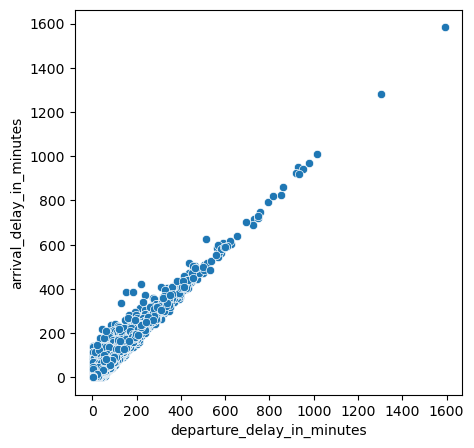

In [37]:
# Departure Delay and Arrival delay are heavily correlated with each other, therefore one of them should be dropped
plt.figure(figsize = (5, 5))
sns.scatterplot(x = 'departure_delay_in_minutes', y = 'arrival_delay_in_minutes', data = df, palette ="autumn" )
plt.show()

In [38]:
#Converting categorical data into Numerical data
#categorical data
# categorical_cols = ['Gender','satisfaction','customer_type'] 
# df = pd.get_dummies(df, columns = categorical_cols)

In [39]:
df.head()

,Gender,age,arrival_delay_in_minutes,baggage_handling,checkin_service,cleanliness,customer_class,customer_type,departure_arrival_time_convenient,departure_delay_in_minutes,...,gate_location,inflight_entertainment,inflight_service,inflight_wifi_service,leg_room_service,onboard_service,online_boarding,satisfaction,seat_comfort,type_of_travel
0,male,13.0,18.0,4,4,5,economy plus,loyal customer,4.0,25.0,...,1,5,5,3,3,4,3,neutral or dissatisfied,5,personal travel
74209,female,66.0,1.0,2,3,1,economy,loyal customer,4.0,1.0,...,4,2,2,2,2,2,3,neutral or dissatisfied,3,business travel
74208,male,68.0,1.0,4,3,2,economy,loyal customer,4.0,1.0,...,1,2,5,2,5,2,2,neutral or dissatisfied,4,personal travel
74207,male,29.0,54.0,4,3,1,economy plus,loyal customer,5.0,52.0,...,3,1,3,1,4,1,1,neutral or dissatisfied,1,personal travel
74204,female,43.0,7.0,1,5,3,economy,loyal customer,5.0,4.0,...,3,1,1,3,3,1,4,neutral or dissatisfied,5,personal travel


In [40]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

for col in df.columns:
    if type(col).__name__ == 'str':
        df[col] = encoder.fit_transform(df[col])

In [41]:
print(encoder.classes_)

['business travel' 'personal travel']


In [42]:
df.head()

,Gender,age,arrival_delay_in_minutes,baggage_handling,checkin_service,cleanliness,customer_class,customer_type,departure_arrival_time_convenient,departure_delay_in_minutes,...,gate_location,inflight_entertainment,inflight_service,inflight_wifi_service,leg_room_service,onboard_service,online_boarding,satisfaction,seat_comfort,type_of_travel
0,1,2,17,3,3,4,2,1,3,24,...,0,4,4,2,2,3,2,0,4,1
74209,0,55,0,1,2,0,1,1,3,0,...,3,1,1,1,1,1,2,0,2,0
74208,1,57,0,3,2,1,1,1,3,0,...,0,1,4,1,4,1,1,0,3,1
74207,1,18,53,3,2,0,2,1,4,51,...,2,0,2,0,3,0,0,0,0,1
74204,0,32,6,0,4,2,1,1,4,3,...,2,0,0,2,2,0,3,0,4,1


In [43]:
# df['Adult'] = df['age']
# df.loc[list(df[df['age'] < 18].index), ['Adult']] = 0
# df.loc[list(df[df['age'] >= 18].index), ['Adult']] = 1


In [44]:
X, y = df.drop(['satisfaction'], axis = 1), df['satisfaction']

In [60]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
# print(X_test[0])

KeyError: 0

In [1]:
X_test[:1]

NameError: name 'X_test' is not defined

In [88]:
a = []
c = X_test.columns
for i in c:
    v = X_test[i]
    a.append(v[0])
a

[1, 2, 17, 3, 3, 4, 2, 1, 3, 24, 2, 359, 4, 0, 4, 4, 2, 2, 3, 2, 4, 1]

In [46]:
# start applying model here
df.head()

,Gender,age,arrival_delay_in_minutes,baggage_handling,checkin_service,cleanliness,customer_class,customer_type,departure_arrival_time_convenient,departure_delay_in_minutes,...,gate_location,inflight_entertainment,inflight_service,inflight_wifi_service,leg_room_service,onboard_service,online_boarding,satisfaction,seat_comfort,type_of_travel
0,1,2,17,3,3,4,2,1,3,24,...,0,4,4,2,2,3,2,0,4,1
74209,0,55,0,1,2,0,1,1,3,0,...,3,1,1,1,1,1,2,0,2,0
74208,1,57,0,3,2,1,1,1,3,0,...,0,1,4,1,4,1,1,0,3,1
74207,1,18,53,3,2,0,2,1,4,51,...,2,0,2,0,3,0,0,0,0,1
74204,0,32,6,0,4,2,1,1,4,3,...,2,0,0,2,2,0,3,0,4,1


In [58]:
from sklearn.preprocessing import StandardScaler

# Normalize Features
print(X_test)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
print(X_test)

[[-0.98769639  1.51086387  0.01379129 ...  1.31439458  0.42040523
   1.53046661]
 [ 1.01245687 -0.28497561 -0.2330064  ... -0.99469674 -0.34154457
  -0.6533955 ]
 [ 1.01245687  0.95829788 -0.3975382  ...  1.31439458  0.42040523
  -0.6533955 ]
 ...
 [-0.98769639  0.47480263 -0.3975382  ...  0.54469748  1.18235503
   1.53046661]
 [-0.98769639  0.26759038 -0.3975382  ...  1.31439458  1.18235503
  -0.6533955 ]
 [ 1.01245687 -1.3901076  -0.3975382  ...  0.54469748  0.42040523
  -0.6533955 ]]
[[-0.98769639  1.51086387  0.01379129 ...  1.31439458  0.42040523
   1.53046661]
 [ 1.01245687 -0.28497561 -0.2330064  ... -0.99469674 -0.34154457
  -0.6533955 ]
 [ 1.01245687  0.95829788 -0.3975382  ...  1.31439458  0.42040523
  -0.6533955 ]
 ...
 [-0.98769639  0.47480263 -0.3975382  ...  0.54469748  1.18235503
   1.53046661]
 [-0.98769639  0.26759038 -0.3975382  ...  1.31439458  1.18235503
  -0.6533955 ]
 [ 1.01245687 -1.3901076  -0.3975382  ...  0.54469748  0.42040523
  -0.6533955 ]]


In [48]:


from sklearn import metrics
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score, classification_report

#confusion matrix visualization
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
import pickle
# Plots the ROC curve using the sklearn methods 
def plot_sklearn_roc_curve(y_real, y_pred):
    fpr, tpr, _ = roc_curve(y_real, y_pred)
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
    roc_display.figure_.set_size_inches(5,5)
    plt.plot([0, 1], [0, 1], color = 'g')


def ModelResults(model, X_train, y_train, X_test, y_test,modelName, verbose=True):

#     Fitting the model in to train data
    model.fit(X_train,y_train)
    pickle.dump(model, open(modelName+'.pkl','wb'))
#     applying model on the test data
    y_pred = model.predict(X_test)
    
#     getting the roc_auc score
    roc_auc = roc_auc_score(y_test, y_pred)
    print("ROC AUC = {}".format(roc_auc))
    
#     getting the classification report
    print(classification_report(y_test,y_pred,digits=5))
    
#     getting the confusion matrix
    cm=confusion_matrix(y_test,y_pred)
    
#     plotting the confusion matrix 
    f, ax=plt.subplots(figsize=(5,5))
    sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    title = "confusion matrix for "+modelName
    plt.title(title,y=-0.2)
    plt.show()
    
#     generating the ROC curve
    y_proba = model.predict_proba(X_test)

    # Plots the ROC curve using the sklearn methods 
    plot_sklearn_roc_curve(y_test, y_proba[:, 1])
    return roc_auc

ROC AUC = 0.8724338138960583
              precision    recall  f1-score   support

           0    0.88062   0.89985   0.89013     17674
           1    0.86913   0.84501   0.85690     13911

    accuracy                        0.87570     31585
   macro avg    0.87488   0.87243   0.87352     31585
weighted avg    0.87556   0.87570   0.87550     31585



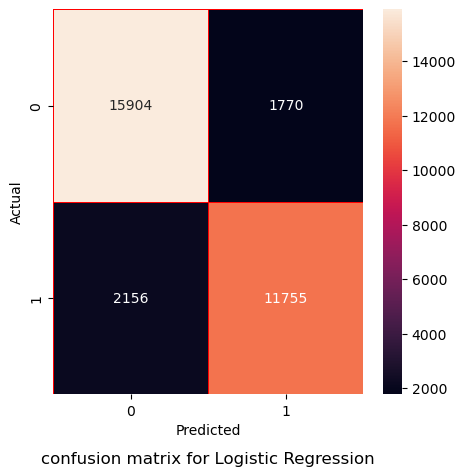

TypeError: cannot unpack non-iterable numpy.float64 object

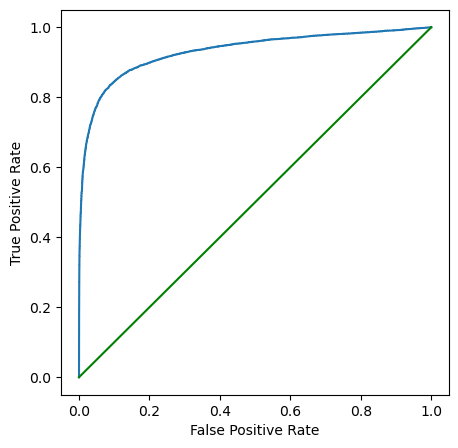

In [49]:

#  Logistic regression
from sklearn.linear_model import LogisticRegression
modellr = LogisticRegression()
rocauclr, cm = ModelResults(modellr, X_train, y_train, X_test, y_test,'Logistic Regression')

ROC AUC = 0.9160566643830373
              precision    recall  f1-score   support

           0    0.90510   0.96000   0.93174     17674
           1    0.94493   0.87212   0.90707     13911

    accuracy                        0.92129     31585
   macro avg    0.92502   0.91606   0.91940     31585
weighted avg    0.92264   0.92129   0.92087     31585



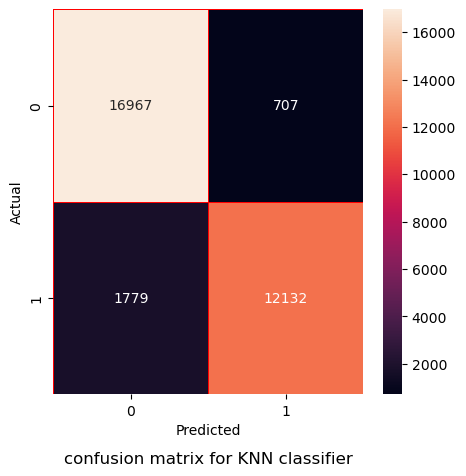

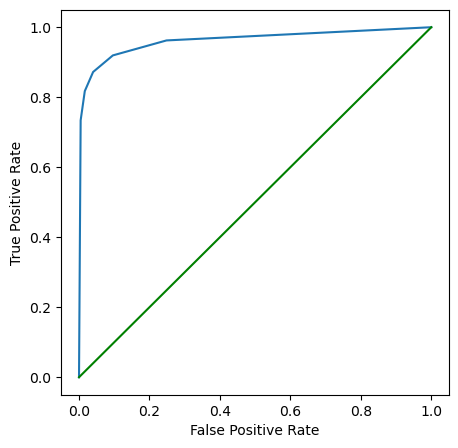

In [50]:

# KNN
from sklearn.neighbors import KNeighborsClassifier
modelknn = KNeighborsClassifier()
rocaucknn = ModelResults(modelknn, X_train, y_train, X_test, y_test, 'KNN classifier')

ROC AUC = 0.9456873431967282
              precision    recall  f1-score   support

           0    0.93622   0.97584   0.95562     17674
           1    0.96756   0.91553   0.94083     13911

    accuracy                        0.94928     31585
   macro avg    0.95189   0.94569   0.94822     31585
weighted avg    0.95002   0.94928   0.94910     31585



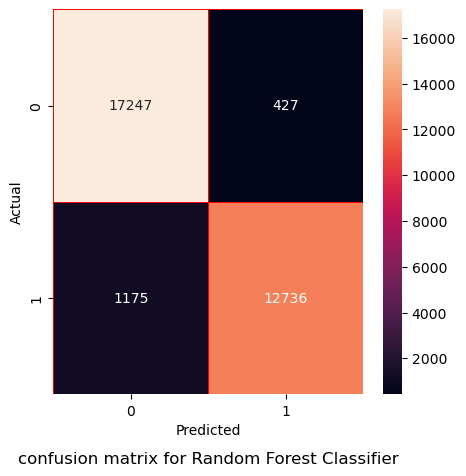

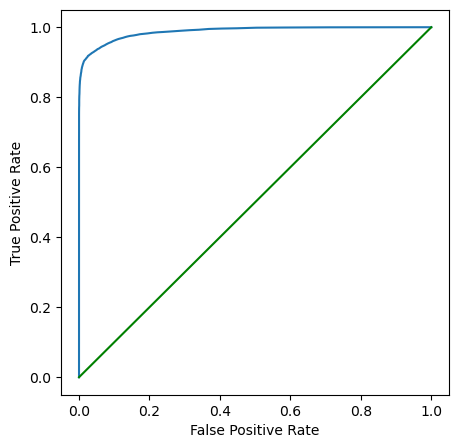

In [51]:

#  Random Forest
from sklearn.ensemble import RandomForestClassifier
modelrf = RandomForestClassifier()
rocaucrf = ModelResults(modelrf, X_train, y_train, X_test, y_test, 'Random Forest Classifier')

ROC AUC = 0.9471313241120521
              precision    recall  f1-score   support

           0    0.93933   0.97420   0.95645     17674
           1    0.96560   0.92006   0.94228     13911

    accuracy                        0.95036     31585
   macro avg    0.95247   0.94713   0.94937     31585
weighted avg    0.95090   0.95036   0.95021     31585



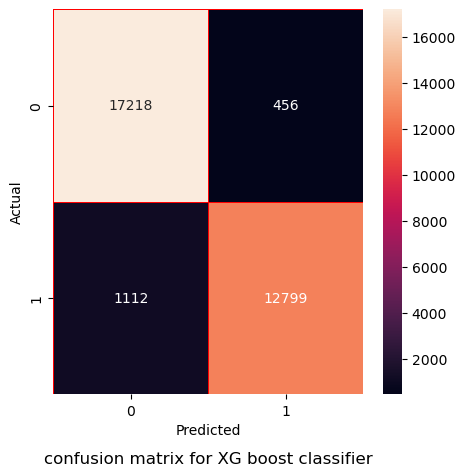

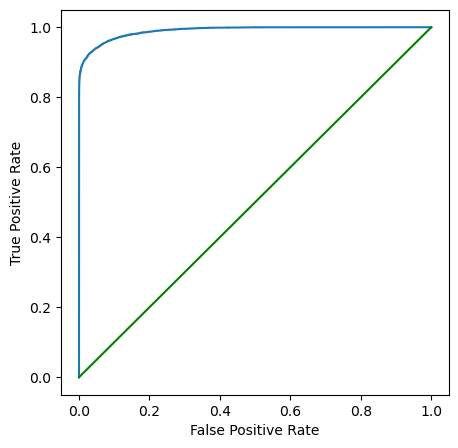

In [52]:

# XGB
import xgboost as xgb
modelxgb = xgb.XGBClassifier()
rocaucxgb = ModelResults(modelxgb, X_train, y_train, X_test, y_test, 'XG boost classifier')

In [ ]:

# SVM
from sklearn.svm import SVC
modelsvm = SVC(probability=True)
rocaucsvm = ModelResults(modelsvm, X_train, y_train, X_test, y_test,'SVM Classifier')

In [ ]:

# Naive Bayes
from sklearn.naive_bayes import GaussianNB
modelnv = GaussianNB()
rocaucnv = ModelResults(modelnv, X_train, y_train, X_test, y_test, 'Naive Bayes CLassifier')

In [ ]:

# Stacking Regression
# estimators = [('SVM',SVC(random_state=42)),('KNN',KNeighborsClassifier()),('dt',DecisionTreeClassifier(max_depth=9))]

# clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
# clf.fit(X_train, y_train)
# y_pred= clf.predict(y_test)
# roc_auc_sr = roc_auc_score(y_test, y_pred)
# get_accuracy(X_train, X_test, y_train, y_test, clf)

In [ ]:
auc_scores = [rocauclr,
rocaucknn,
rocaucrf,
rocaucxgb,
rocaucsvm,
rocaucnv,]

model_scores = pd.DataFrame(auc_scores, index=["Logistic regression","KNN","Random Forest","XGB","SVM","Naive Bayes",], columns=['AUC',])
model_scores.head()